# Rain data preparation and unit testing (Pmast and KNMI)

## Setup and fetch data

In [1]:
# Settings
Username   = 'Beheerder'
years      = range(2001,2021)    #(1997,2021) # Set years to download

In [2]:
import os
datapath   = os.path.join('../../') #since this file is 2 dir down from the data it's ../../
print('datapath is set to %s'%datapath)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import plotly.express as px
#import cufflinks as cf
import matplotlib.dates as mdate
import matplotlib.ticker as ticker
from matplotlib import cm
#from colorspacious import cspace_converter
import scipy.stats as stats
#cf.go_offline()
# cf.set_config_file(offline=False, world_readable=True)

from datetime import datetime, timedelta
import sys
sys.path.insert(0, os.path.join(datapath,'PythonScripts'))
sys.path.append('../') #append the directory above this one to path to be able to find my python modules

from Loobos_Toolbox import dateparse, dateparse_Gapfilled, Read_LoobosEddFinal, Read_LooStor, Read_LoodatGapfill, Read_Loobos_halfhourly, Read_Loobos_meteo, Read_Loobos_soil, Read_Loobos_profile

from Ags_model import runAgs, runAgs2, calc_LE
import matplotlib.dates as mdates

datapath is set to ../../


In [3]:
#these next two lines are to prevent re-loading the data. If you want to re-load data, instead comment them out
if not 'progress' in globals(): progress = list()
if not 'dataloaded' in progress:
  # Read files
    df_meteo        = Read_Loobos_meteo      (years,datapath)
    df_Comb         = Read_LoodatGapfill     (years,datapath)
    progress.append('dataloaded')

Loading 2001


C:\Users\feder\Workspace\Thesis\PythonScripts\FigurePlotting\../../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2002


C:\Users\feder\Workspace\Thesis\PythonScripts\FigurePlotting\../../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2003


C:\Users\feder\Workspace\Thesis\PythonScripts\FigurePlotting\../../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2004


C:\Users\feder\Workspace\Thesis\PythonScripts\FigurePlotting\../../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2005


C:\Users\feder\Workspace\Thesis\PythonScripts\FigurePlotting\../../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2006


C:\Users\feder\Workspace\Thesis\PythonScripts\FigurePlotting\../../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2007
Loading 2008


C:\Users\feder\Workspace\Thesis\PythonScripts\FigurePlotting\../../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\FigurePlotting\../../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2009


C:\Users\feder\Workspace\Thesis\PythonScripts\FigurePlotting\../../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2010


C:\Users\feder\Workspace\Thesis\PythonScripts\FigurePlotting\../../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2011


C:\Users\feder\Workspace\Thesis\PythonScripts\FigurePlotting\../../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2012


C:\Users\feder\Workspace\Thesis\PythonScripts\FigurePlotting\../../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2013


C:\Users\feder\Workspace\Thesis\PythonScripts\FigurePlotting\../../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2014


C:\Users\feder\Workspace\Thesis\PythonScripts\FigurePlotting\../../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2015


C:\Users\feder\Workspace\Thesis\PythonScripts\FigurePlotting\../../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2016


C:\Users\feder\Workspace\Thesis\PythonScripts\FigurePlotting\../../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2017


C:\Users\feder\Workspace\Thesis\PythonScripts\FigurePlotting\../../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2018


C:\Users\feder\Workspace\Thesis\PythonScripts\FigurePlotting\../../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


Loading 2019
Loading 2020


C:\Users\feder\Workspace\Thesis\PythonScripts\FigurePlotting\../../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))
C:\Users\feder\Workspace\Thesis\PythonScripts\FigurePlotting\../../PythonScripts\Loobos_Toolbox.py:171: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_meteo     .append(pd.read_csv(infilename, index_col='YearDayTime', parse_dates=['YearDayTime'], date_parser=dateparse))


df_meteo loaded. Columns in this dataframe:
Index(['Daynumber', 'Time', 'S(i)', 'S(o)', 'L(i)', 'L(o)', 'G1', 'PAR',
       'H2OLic', 'CO2Lic', '-q', 'Te(vaisal)', 'Te-L(i)', 'Te-L(o)', '-u(z)',
       '-u(dir)', 'Min u(z)', 'WSC therm', 'SD S(i)', 'SD S(o)', 'SD L(i)',
       'SD L(o)', 'SD G1', 'SD PAR', 'SD H2OLic', 'SD CO2Lic', 'SD q',
       'SD Te(vaisal)', 'Battery V', 'CR10 temp', 'P(mast)00', 'P(guter)00',
       'P(mast)05', 'P(guter)05', 'P(mast)10', 'P(guter)10', 'P(mast)15',
       'P(guter)15', 'P(mast)20', 'P(guter)20', 'P(mast)25', 'P(guter)25',
       'P(mast)', 'P(guter)', 'P(field)', 'L(i)corr', 'L(o)corr', 'R(net)',
       'P(guter)corr', 'Pcorr', 'PARrefl', 'PARdiff', 'H2Olic', 'CO2lic',
       'Vbatt', 'CR10temp', 'SD u(z)', '#NAME?', '#NAME?.1', '#NAME?.2'],
      dtype='object')
Loading 2001
Loading 2002
Loading 2003
Loading 2004
Loading 2005
Loading 2006
Loading 2007
Loading 2008
Loading 2009
Loading 2010
Loading 2011
Loading 2012
Loading 2013
Loading 2014
Load

In [4]:
#df_Comb['LE'].plot()

In [5]:
#df_Comb['LE_f'].plot()

### KNMI neerslagtekort data

In [3]:
# Custom function to convert float value representing fractional years to datetime
#function doesn't really work, due to rounding errors somtimes rows end up having duplicate indexes
def convert_frac_to_datetime(date):
    from calendar import isleap #import statement inside function because this function doesn't really work so I don't always load it
    year = int(date)
    if isleap(year):
        days = int((date - year) * 366)
    else:
        days = int((date - year) * 365)
    base_date = pd.to_datetime(f'{year}-01-01')
    return base_date + pd.DateOffset(days=days)

def generate_knmi_SPEI_anom(path):
    output=pd.read_csv(path,delim_whitespace=True)
    #input['year']=np.floor(input['date'])
    output_index=pd.date_range(start='1997-04-01', end='1997-09-30', freq='1D') #initalize datetimeindex so I can concat to it.
    output_index=pd.Series(output_index) #cast to series because datetimeindex objects aren't concat-able
    for year in range(1998,2024):
        tmp_index=pd.date_range(start=str(year)+'-04-01', end=str(year)+'-09-30', freq='1D')
        series_index=pd.Series(tmp_index) #cast to series so I can concat
        #print('adding '+str(len(series_index))+' rows: '+str(year)) #debug
        output_index=pd.concat([output_index,series_index],axis=0,ignore_index=True) #append to previous, ignore_index=True or else you get duplicate index entries
        #print('new total len: '+str(len(output_index))) #debug
    
    output.index=pd.DatetimeIndex(output_index) #cast to DatetimeIndex and assign as index)
    output.rename(columns={'date':'frac_date'},inplace=True) #rename column to fractional date (original date format in case for debugging)
    return output

def check_rows_SPEI(path): #for debugging which year doesn't have the right amount of rows
    tmp=pd.read_csv(path,delim_whitespace=True)
    tmp['year']=np.floor(tmp['date'])
    for year in range(1997,2024):
        if len(tmp.loc[tmp['year']==year])==183: #there are 183 days between 1 april and 30 september
            print(str(year)+' has 183 days (april1-sep30)')
        else:
            print("year doesn't have 183 days: "+str(year))

In [9]:
df_knmi_Pdfct=generate_knmi_SPEI_anom('../../KNMI_regen/int_nl_a2.txt')
df_knmi_Pdfct

frac_date    deficit
1997-04-01  1997.2466   0.765839
1997-04-02  1997.2493   1.628760
1997-04-03  1997.2521   2.658460
1997-04-04  1997.2548   3.455690
1997-04-05  1997.2576  -0.617146
...               ...        ...
2023-09-26  2023.7343  27.189000
2023-09-27  2023.7369  29.517000
2023-09-28  2023.7397  31.387200
2023-09-29  2023.7424  32.693200
2023-09-30  2023.7452  32.973700

[4941 rows x 2 columns]

### measured ET process data

In [10]:
# ET is in Wm-2. Convert to mm.
#columns of interest 'LE' 'LE_orig', 'LE_f', 'LE_fqc', 'LE_fall', 'LE_fall_qc', 'LE_fnum', 'LE_fsd', 'LE_fmeth', 'LE_fwin'

years_range=(str(list(years)[0])+'-01-01',str(list(years)[-1])+'-12-31') #daterange based on the years variable defined at the top
df_LE=df_Comb.loc[years_range[0]:years_range[1],['LE']]
df_LE=df_LE.loc[df_LE['LE']>-200]
df_LE=df_LE.resample('3H').mean()
df_LE=df_LE.resample('1D').sum()
#df_LE['LE_MJm2day']=df_LE['LE']/0.0864 #1W/m2 = 0.0864 MJ /m2/day
#df_LE['LE_mmday']=df_LE['LE_MJm2day']/0.408 #1 MJ /m2/day  =0.408 mm /day
df_LE['LE_mmday2']=df_LE['LE']*0.03521

df_LE_f=df_Comb.loc[years_range[0]:years_range[1],['LE_f']]
df_LE_f=df_LE_f.resample('3H').mean()
df_LE_f=df_LE_f.resample('1D').sum()
#df_LE_f['LE_MJm2day']=df_LE_f['LE_f']/0.0864 #1W/m2 = 0.0864 MJ /m2/day
#df_LE_f['LE_mmday']=df_LE_f['LE_MJm2day']/0.408 #1 MJ /m2/day  =0.408 mm /day .
df_LE_f['LE_mmday2']=df_LE_f['LE_f']*0.03521

<Axes: >

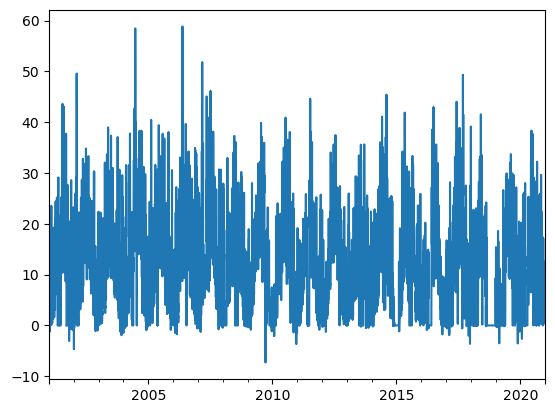

In [11]:
df_LE['LE_mmday2'].plot()

<Axes: >

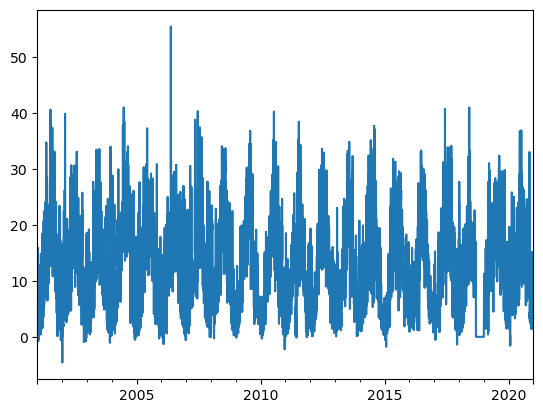

In [12]:
df_LE_f['LE_mmday2'].plot()

### KNMI fetch data

In [14]:
#datapath = os.path.join('../KNMI_regen')
#print(datapath)
knmi_regen=pd.read_csv('../../KNMI_regen/neerslaggeg_KOOTWIJK-RADIO_567.txt',sep=',',header=17)
knmi_regen=knmi_regen.iloc[28000:] #remove dataset before ~ 2001 to speed up calculations
#knmi_regen=knmi_regen.iloc[31000:] #remove dataset before ~november 2007
knmi_regen['date']=pd.to_datetime(knmi_regen['YYYYMMDD'],yearfirst=True,format='%Y%m%d')
knmi_regen.index=knmi_regen['date']
knmi_regen=knmi_regen.rename(columns={"   RD": "RD", "   SX": "SX"}) #for some reason there's spaces in some of the column names, removing them.
knmi_regen=knmi_regen.astype({"RD": np.intc}) #Column RD is is rain daily sum, SX is code related to snow. If unnamed contains 4 spaces it's also a code for snow. STN is station ID.
years_range=(str(list(years)[0])+'-01-01',str(list(years)[-1])+'-12-31') #daterange based on the years variable defined at the top
df_knmi_daily=knmi_regen.loc[years_range[0]:years_range[1],['RD']]/10 #RD is in tenths of mm so divide by 10
#df_knmi_daily.plot()

## locally calculated neerslagtekort

In [15]:
df_Comb.columns

Index(['Year', 'DoY', 'Hour', 'qcNEE', 'NEE', 'LE', 'H', 'Rg', 'Tair', 'Tsoil',
       'rH', 'Ustar', 'VPD', 'NEE_orig', 'NEE_f', 'NEE_fqc', 'NEE_fall',
       'NEE_fall_qc', 'NEE_fnum', 'NEE_fsd', 'NEE_fmeth', 'NEE_fwin',
       'Rg_orig', 'Rg_f', 'Rg_fqc', 'Rg_fall', 'Rg_fall_qc', 'Rg_fnum',
       'Rg_fsd', 'Rg_fmeth', 'Rg_fwin', 'H_orig', 'H_f', 'H_fqc', 'H_fall',
       'H_fall_qc', 'H_fnum', 'H_fsd', 'H_fmeth', 'H_fwin', 'LE_orig', 'LE_f',
       'LE_fqc', 'LE_fall', 'LE_fall_qc', 'LE_fnum', 'LE_fsd', 'LE_fmeth',
       'LE_fwin', 'Tair_orig', 'Tair_f', 'Tair_fqc', 'Tair_fall',
       'Tair_fall_qc', 'Tair_fnum', 'Tair_fsd', 'Tair_fmeth', 'Tair_fwin',
       'PotRad', 'FP_NEEnight', 'FP_Temp', 'E_0', 'R_ref', 'Reco', 'GPP_f',
       'GPP_fqc'],
      dtype='object')

In [16]:
df_Pdef=pd.DataFrame()
df_Pdef=df_knmi_Pdfct.loc['2000-01-01':'2020-12-31',['deficit']]

df_Pdef=df_Pdef.merge(df_LE['LE_mmday2'], how='inner',left_index=True, right_index=True)
df_Pdef=df_Pdef.merge(df_knmi_daily['RD'], how='inner',left_index=True, right_index=True)

#df_Pdef['ET']=df_LE['LE_mmday2']
#df_Pdef['Prec']=df_knmi_daily['RD']
df_Pdef['Loo_deficit']=df_Pdef['LE_mmday2']-df_Pdef['RD'] #local deficit

<Axes: >

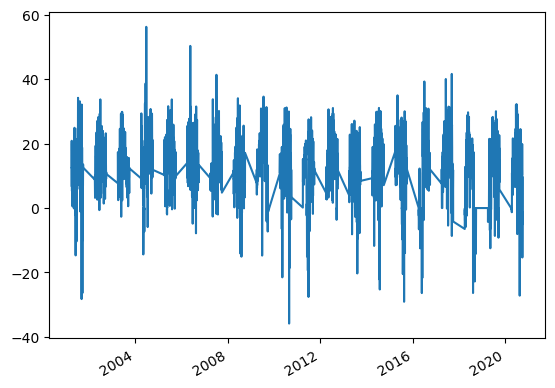

In [17]:
df_Pdef['Loo_deficit'].plot()

## Cleanup data and Calculations

### P(mast) Rain data

In [18]:
#df_meteo.columns
#'P(guter)','P(guter)00', 'P(guter)05', 'P(guter)10','P(guter)15','P(guter)20', 'P(guter)25',
#'P(mast)','P(mast)00','P(mast)05', 'P(mast)10', 'P(mast)15','P(mast)20','P(mast)25'
#'P(field)',
#'P(guter)corr',
#'Pcorr'

<Axes: >

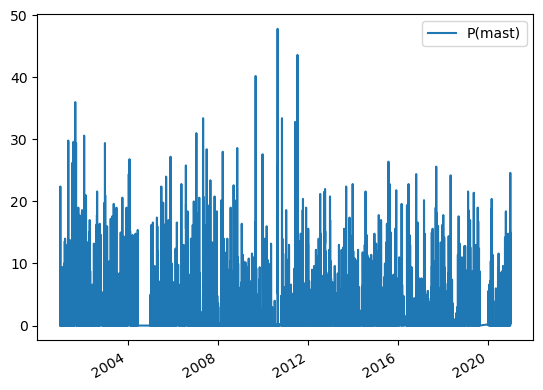

In [19]:
df_Pmast = df_meteo[['P(mast)']]
df_Pmast_daily = df_Pmast.resample('1D').sum(min_count=1) #min_count makes the NaN entries become NaN in the sum, otherwise they are 0
df_Pmast_8to8 = df_Pmast.resample('1D', offset=pd.Timedelta('8H')).sum(min_count=1) #this sets it so it's 8:00 to the following day 8:00
df_Pmast_8to8.index=df_Pmast_8to8.index.floor('1D') #remove the 8:00 timestamp on the index
df_Pmast_8to8.index=df_Pmast_8to8.index.shift(freq='1D')

df_Pmast=df_Pmast.dropna()
df_Pmast_daily=df_Pmast_daily.dropna()
df_Pmast_8to8=df_Pmast_8to8.dropna()

df_Pmast_8to8.plot()

In [20]:
#big gaps where there is significant knmi signal but no pmast (for making a quality flag)
#quality flag, 1=most reliable, 2=not reliable
#2001 is good
df_Pmast_8to8['Pmast_qc']=np.nan
df_Pmast_8to8.loc[(df_Pmast_8to8.index.month>=4) & (df_Pmast_8to8.index.month<=10),'Pmast_qc']=1

df_Pmast_8to8.loc['2002-06-13':'2002-07-02','Pmast_qc']=2
df_Pmast_8to8.loc['2003-05-01':'2003-05-06','Pmast_qc']=2
df_Pmast_8to8.loc['2004-06-17':'2004-10-31','Pmast_qc']=2
df_Pmast_8to8.loc['2008-08-02':'2008-09-01','Pmast_qc']=2
df_Pmast_8to8.loc['2010-06-06':'2010-08-26','Pmast_qc']=2
df_Pmast_8to8.loc['2010-09-07':'2010-10-27','Pmast_qc']=2
#2011 is good
#2012 is good
df_Pmast_8to8.loc['2013-09-04':'2013-10-15','Pmast_qc']=2
df_Pmast_8to8.loc['2014-04-26':'2014-05-29','Pmast_qc']=2
#2015 is good
df_Pmast_8to8.loc['2016-04-01':'2016-05-15','Pmast_qc']=2
#2017 is good
df_Pmast_8to8.loc['2018-06-08':'2018-06-10','Pmast_qc']=2
df_Pmast_8to8.loc['2019-08-13':'2019-10-31','Pmast_qc']=2
#2020 is good

### Pmast days since rain calculation

In [21]:
df_Pmast_8to8['index_shift'] = df_Pmast_8to8.index.shift(freq='1D')
df_Pmast_8to8['timestep']=df_Pmast_8to8['index_shift']-df_Pmast_8to8.index
df_Pmast_8to8['is_1d']=df_Pmast_8to8['timestep']==pd.Timedelta(days=1)
df_Pmast_8to8['days_since_rain']=np.nan #init the new column for assignment

counter=0
for index, row in df_Pmast_8to8.iterrows():
    if row['P(mast)']!=0.0: #if rain isnt zero, reset counting to 0
        counter=0
        df_Pmast_8to8.loc[index,'days_since_rain']=counter
    else: #rain is zero, keep counting up
        if row['is_1d']: #if true, then timedelta is 1 and you keep going, otherwise there's a gap in data and rest to 0
            counter=counter+1
            df_Pmast_8to8.loc[index,'days_since_rain']=counter              
        else: #there is a gap in the data, previous entry not one day before, reset counter to 0
            counter=0
            df_Pmast_8to8.loc[index,'days_since_rain']=counter

df_Pmast_8to8=df_Pmast_8to8.drop(['index_shift','timestep','is_1d'],axis=1) #drop unneeded columns

In [22]:
df_Pmast_8to8.to_csv('./Pmast_8to8.csv')

In [23]:
#pd.set_option('display.max_rows', None)
#df_Pmast.loc['2004-06-13':'2005-01-01','P(mast)']

#pd.set_option('display.max_rows', None)
#df_Pmast.loc['2019-08-09':'2020-01-02','P(mast)']

In [24]:
#Compare different Rain data from df_meteo
#still WIP 

### KNMI Rain import

### KNMI days since rain calculation

In [25]:
df_knmi_daily['index_shift'] = df_knmi_daily.index.shift(freq='1D')
df_knmi_daily['timestep']=df_knmi_daily['index_shift']-df_knmi_daily.index
df_knmi_daily['is_1d']=df_knmi_daily['timestep']==pd.Timedelta(days=1)
df_knmi_daily['days_since_rain']=np.nan #init the new column for assignment

counter=0
for index, row in df_knmi_daily.iterrows():
    if row['RD']!=0.0: #if rain isnt zero, reset counting to 0
        counter=0
        df_knmi_daily.loc[index,'days_since_rain']=counter
    else: #rain is zero, keep counting up
        if row['is_1d']: #if true, then timedelta is 1 and you keep going, otherwise there's a gap in data and rest to 0
            counter=counter+1
            df_knmi_daily.loc[index,'days_since_rain']=counter        
        else: #there is a gap in the data, previous entry not one day before, reset counter to 0
            counter=0
            df_knmi_daily.loc[index,'days_since_rain']=counter

df_knmi_daily=df_knmi_daily.drop(['index_shift','timestep','is_1d'],axis=1) #drop unneeded columns

In [26]:
df_knmi_daily.to_csv('./knmi_rain_daily.csv')

### Manual check for missing day rows

In [27]:
def check_continuous(df, freq):
    df['index_shift'] = df.index.shift(freq=freq)
    df['timestep'] = df['index_shift'] - df.index
    df['is_timestep'] = df['timestep']==pd.Timedelta(freq)
    return df.loc[df['is_timestep']==False]

In [28]:
#check_continuous(df_knmi_daily,'1D')
#check_continuous(df_Pmast_daily,'1D')
#check_continuous(df_Pmast,'30min')

## Visualize difference in precipitation pmast and knmi

In [29]:
#df_Pmast_8to8.loc['2003-05-01':'2003-05-06',['P(mast)']]
#df_knmi_daily.loc['2003-05-01':'2003-05-06',['RD']]

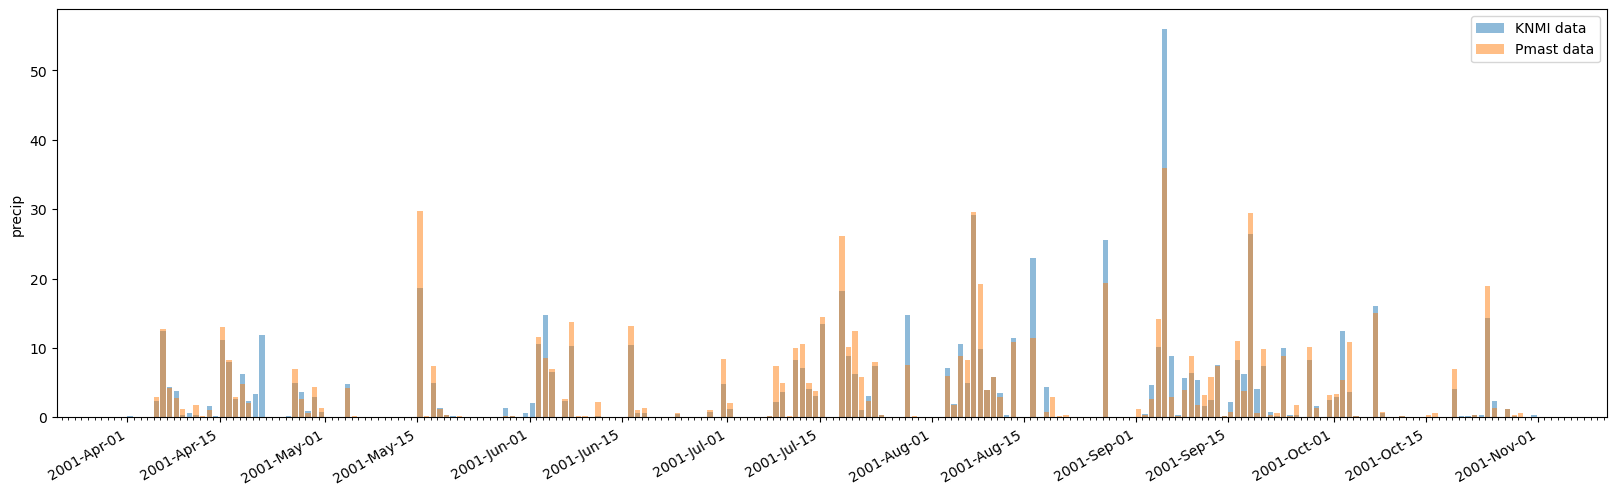

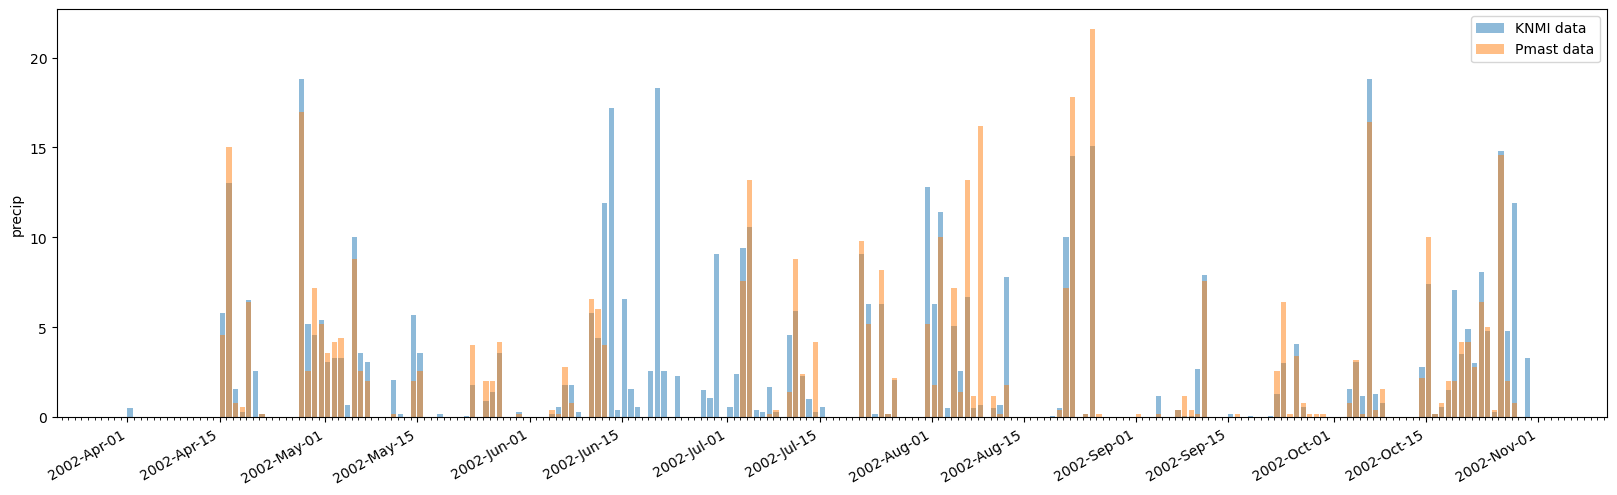

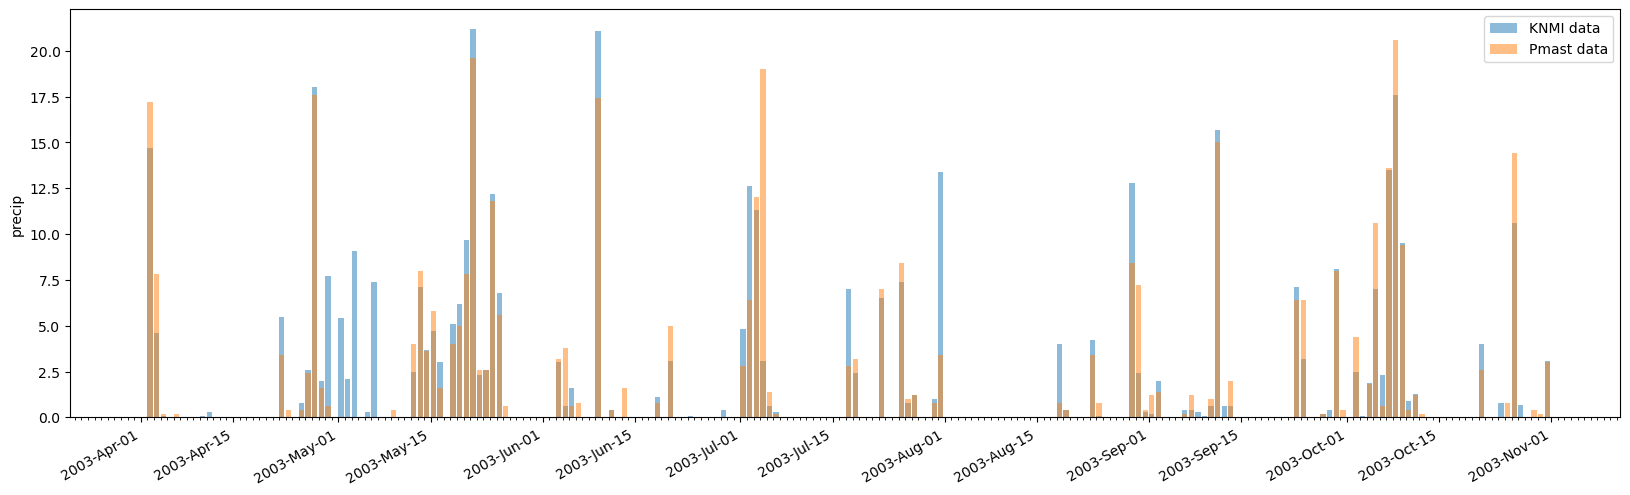

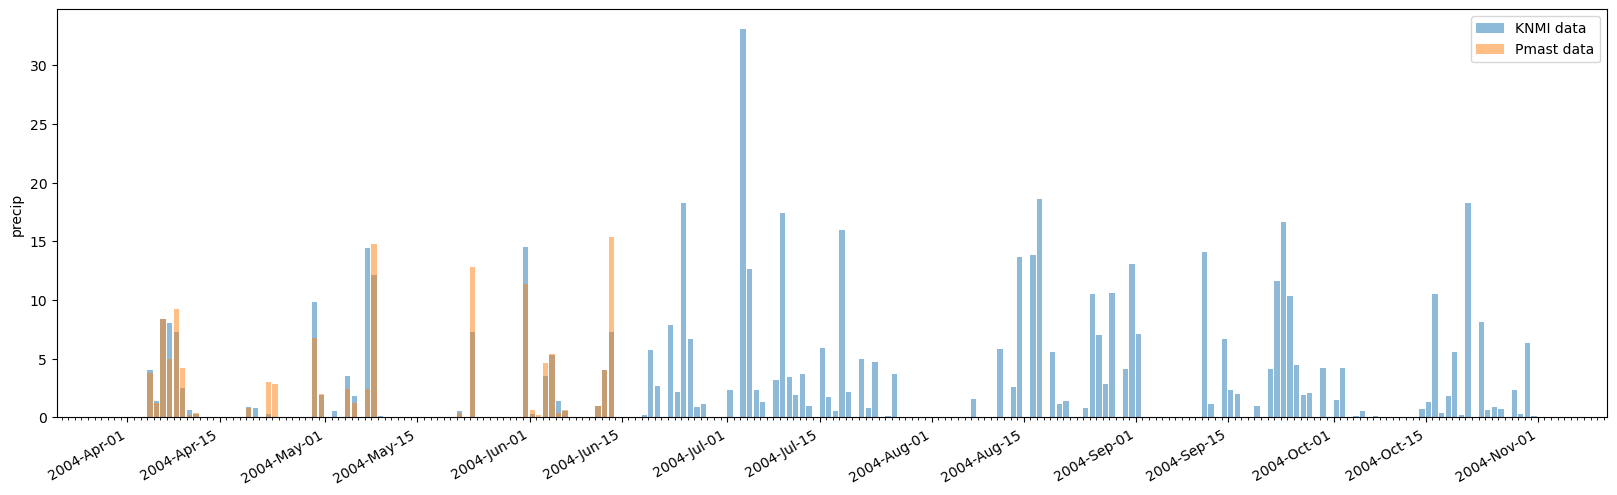

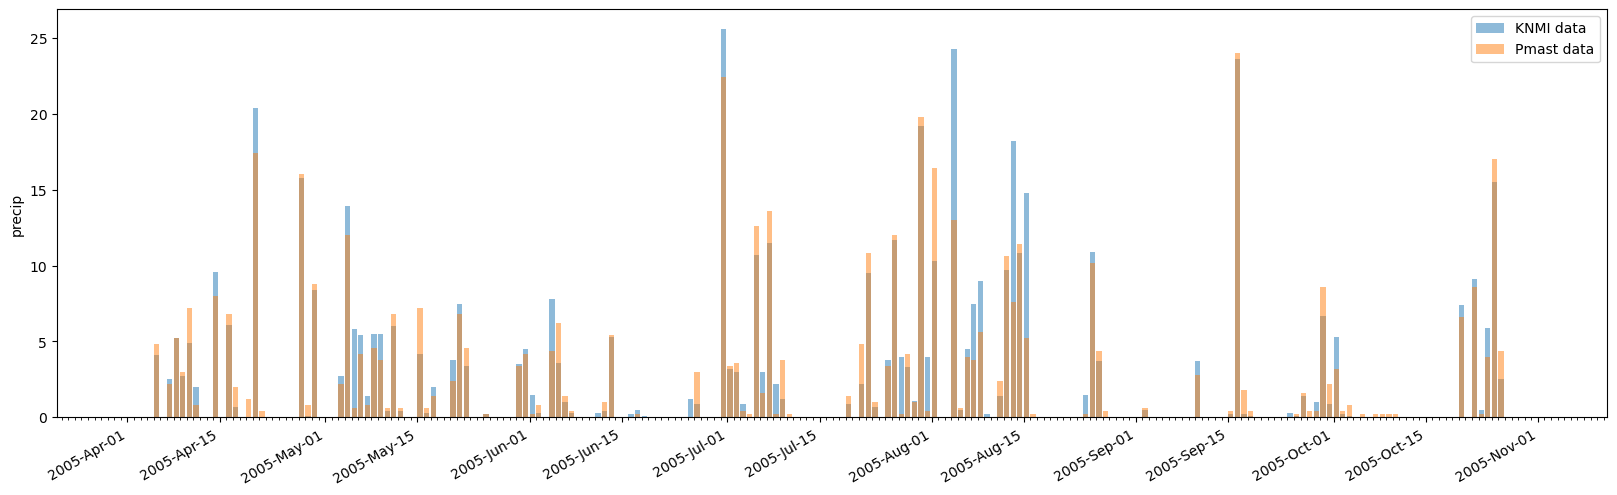

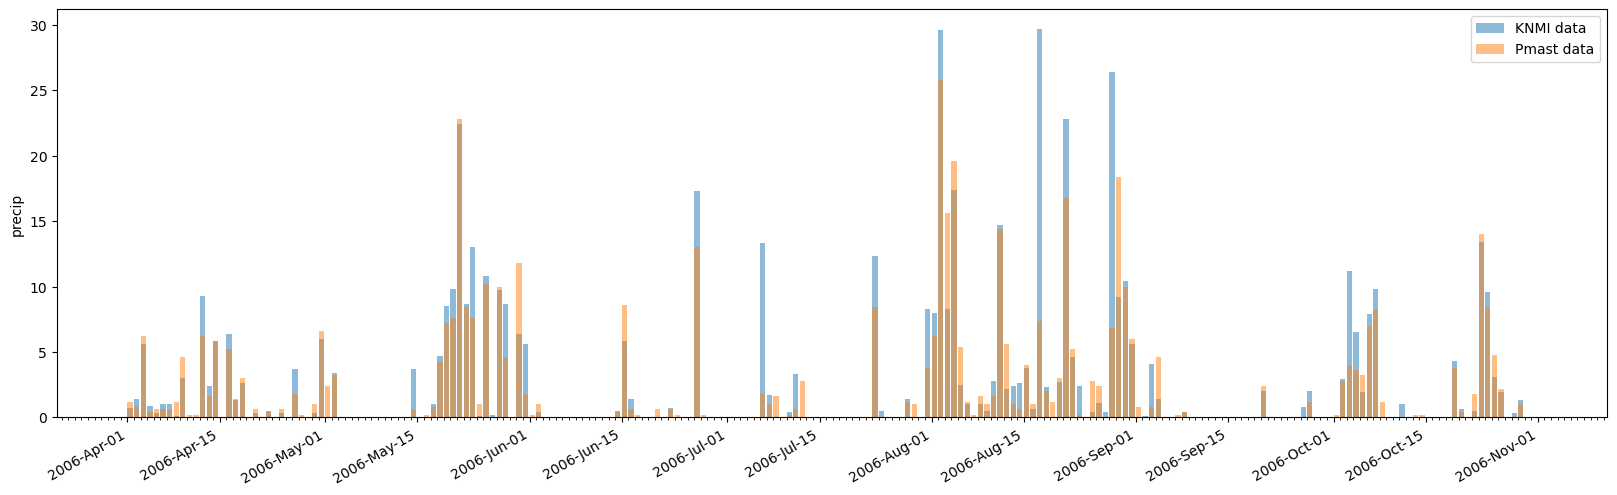

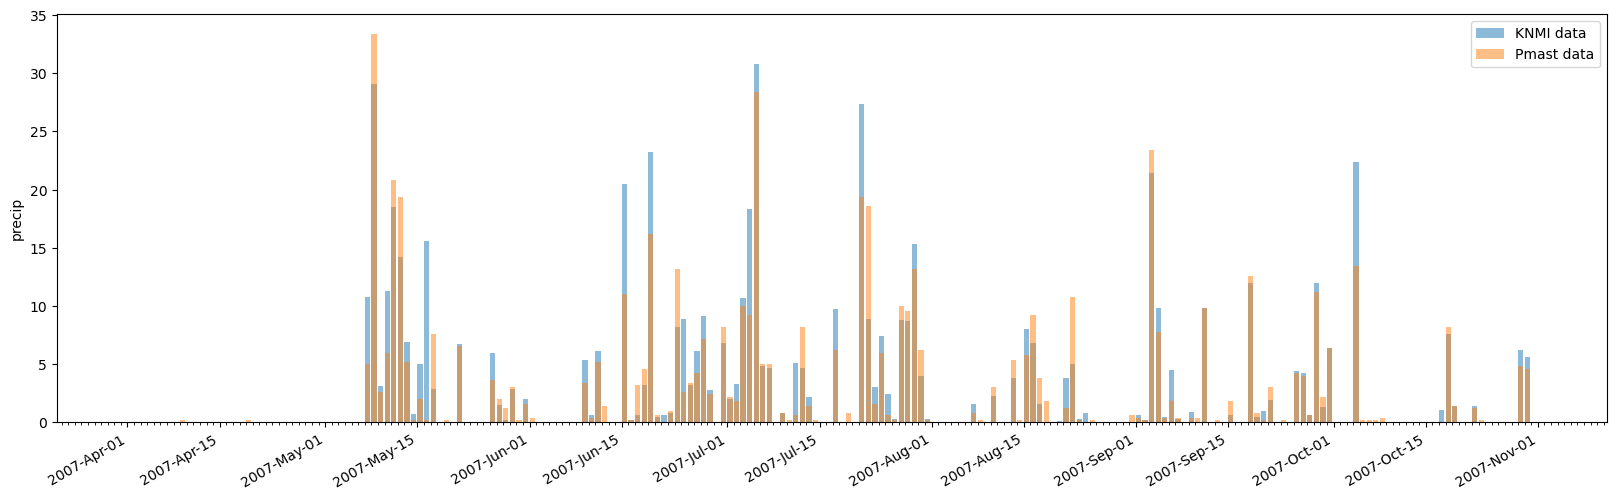

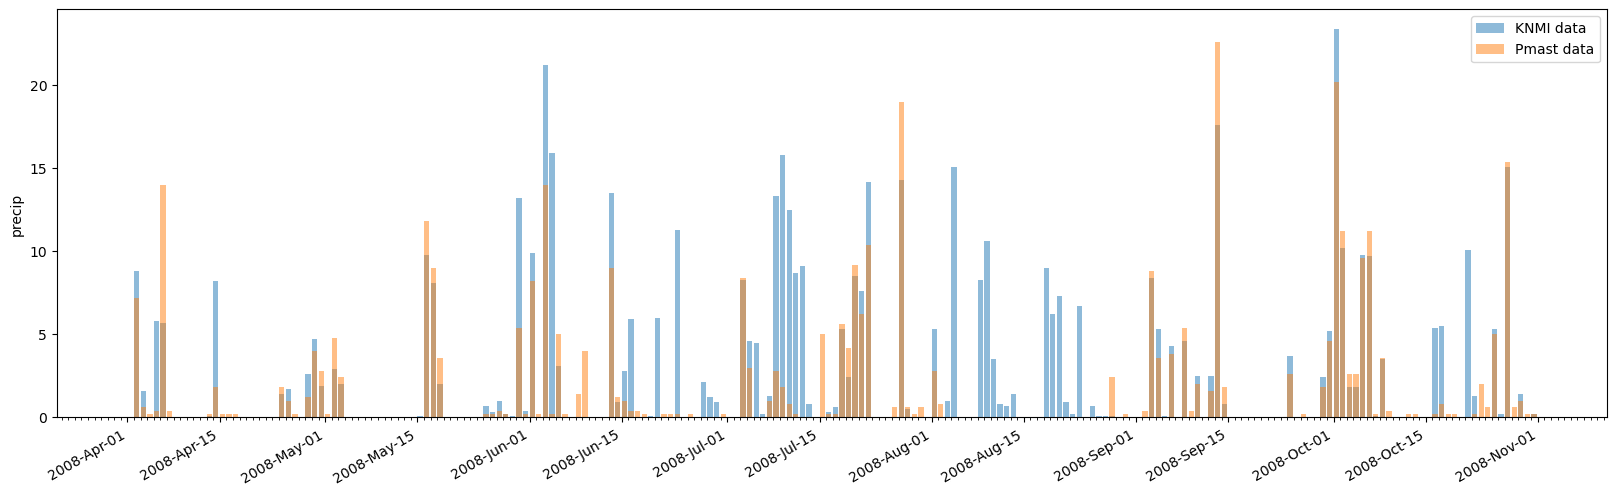

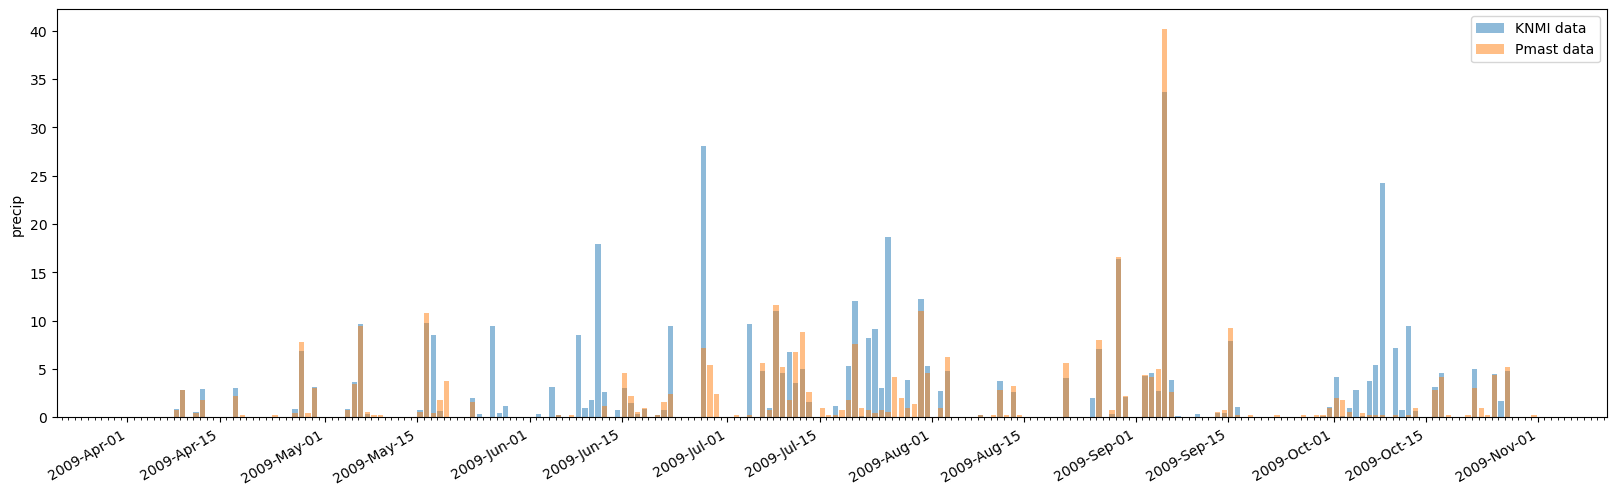

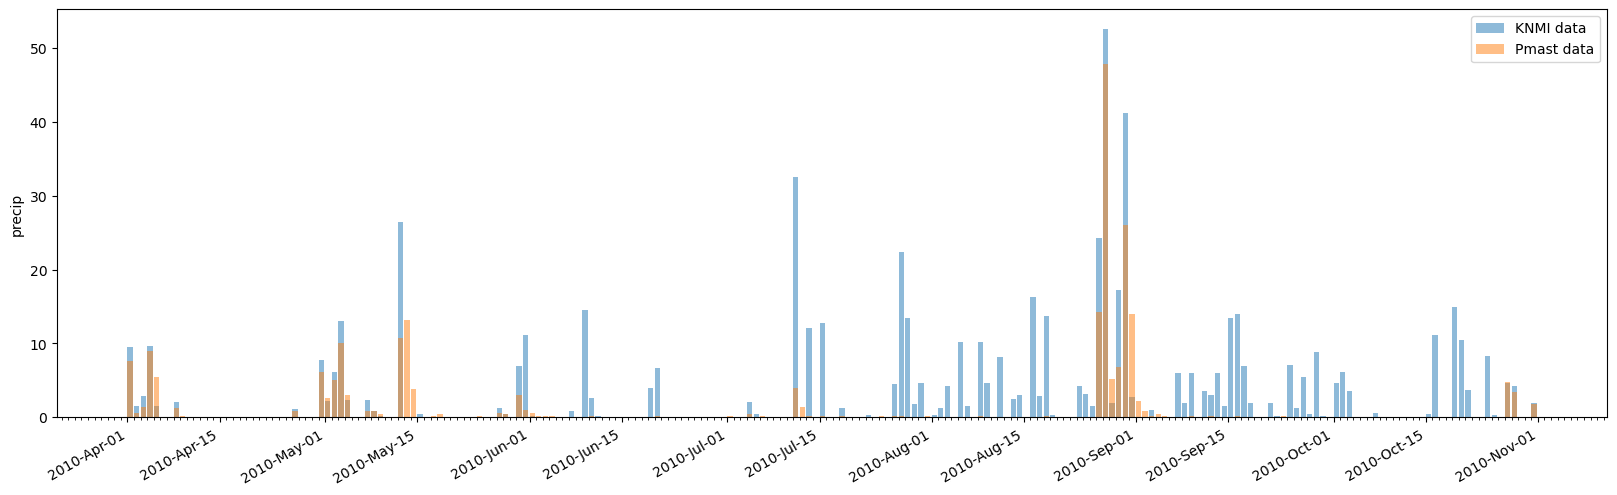

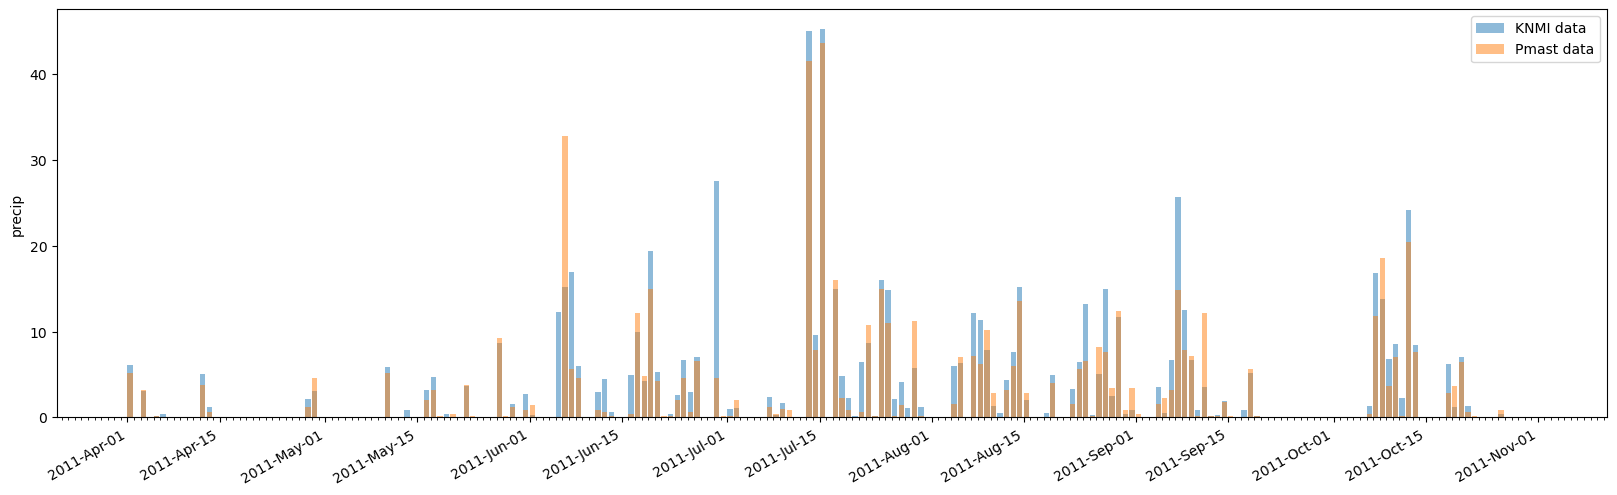

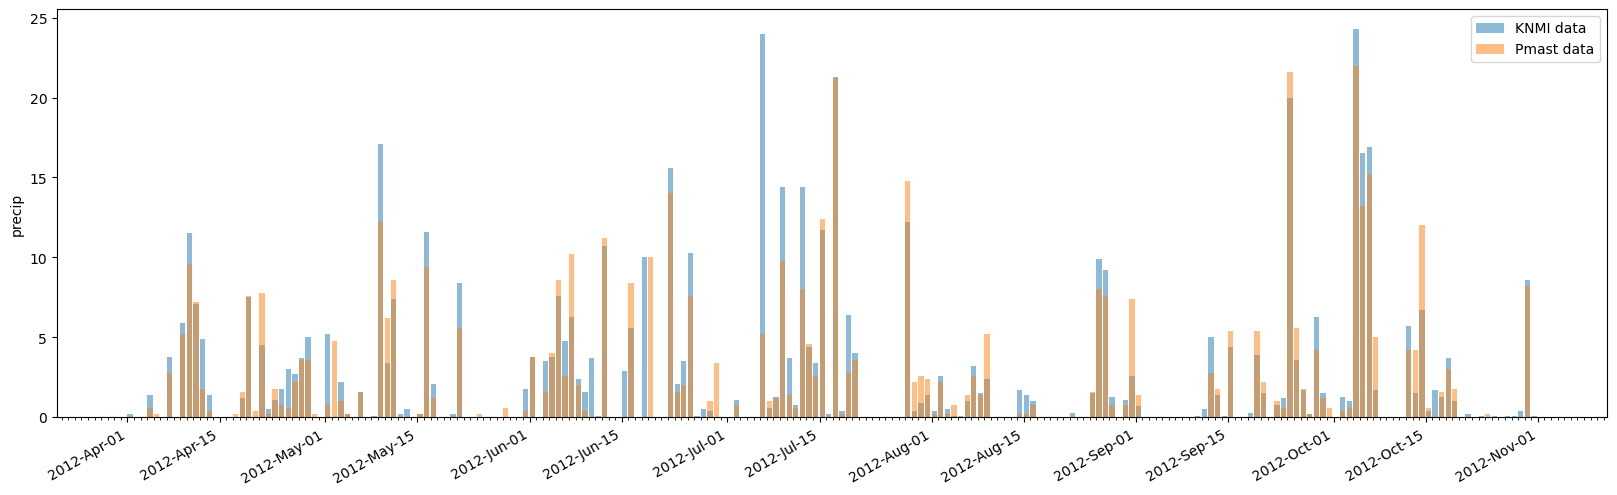

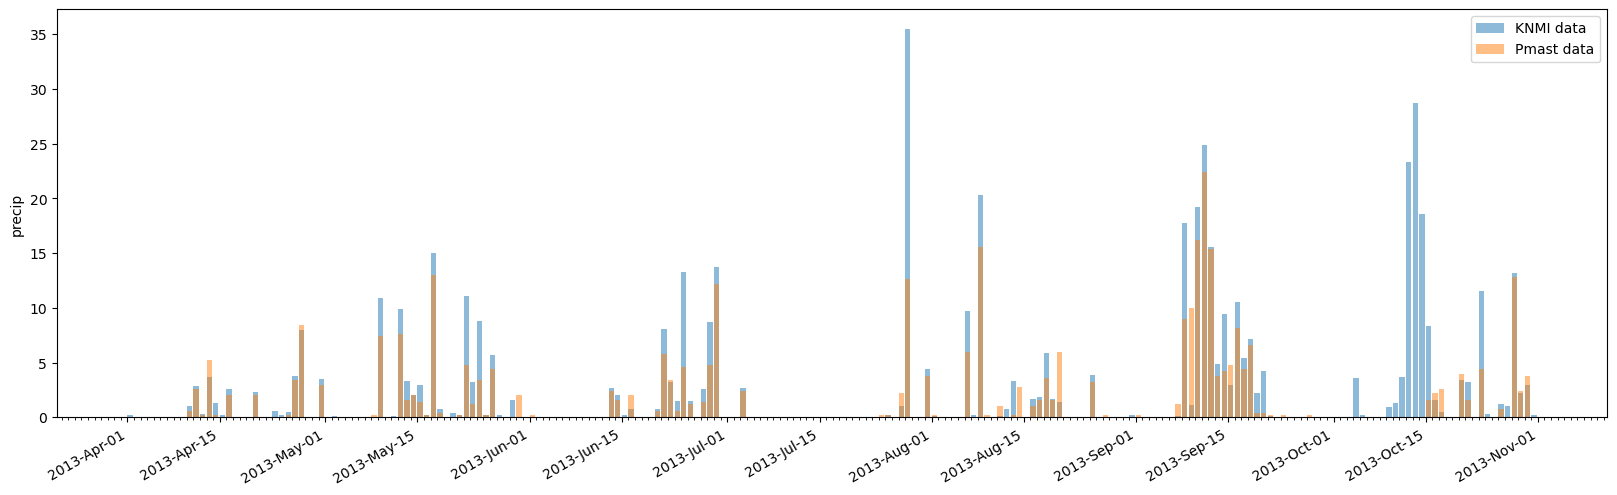

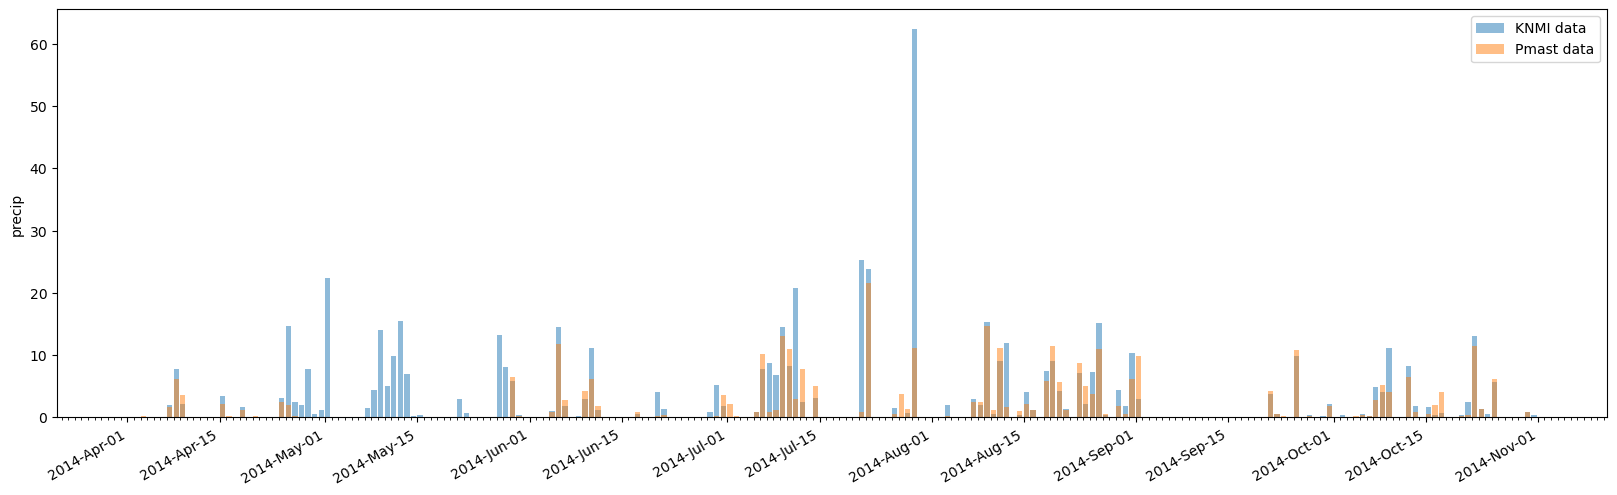

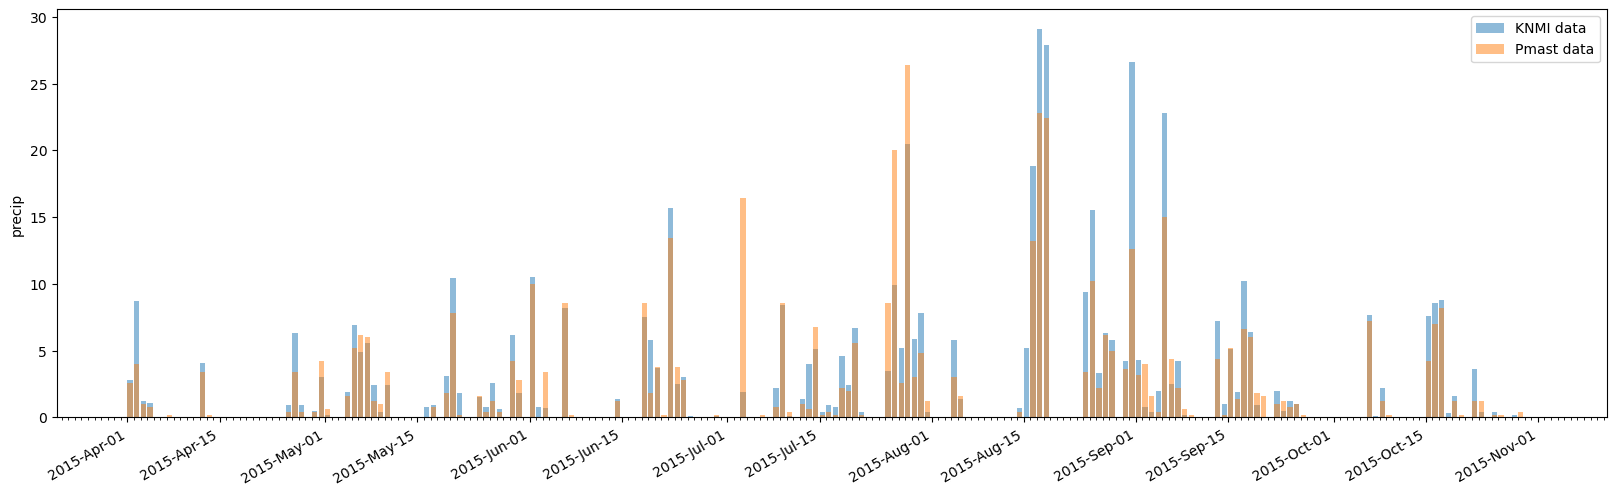

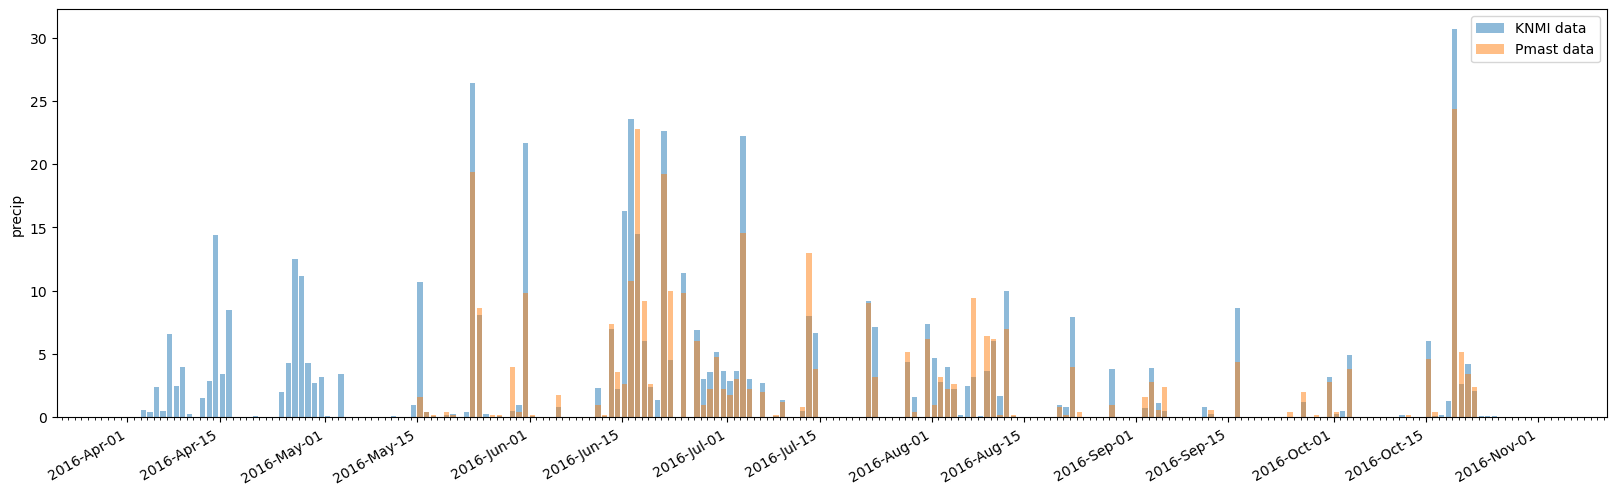

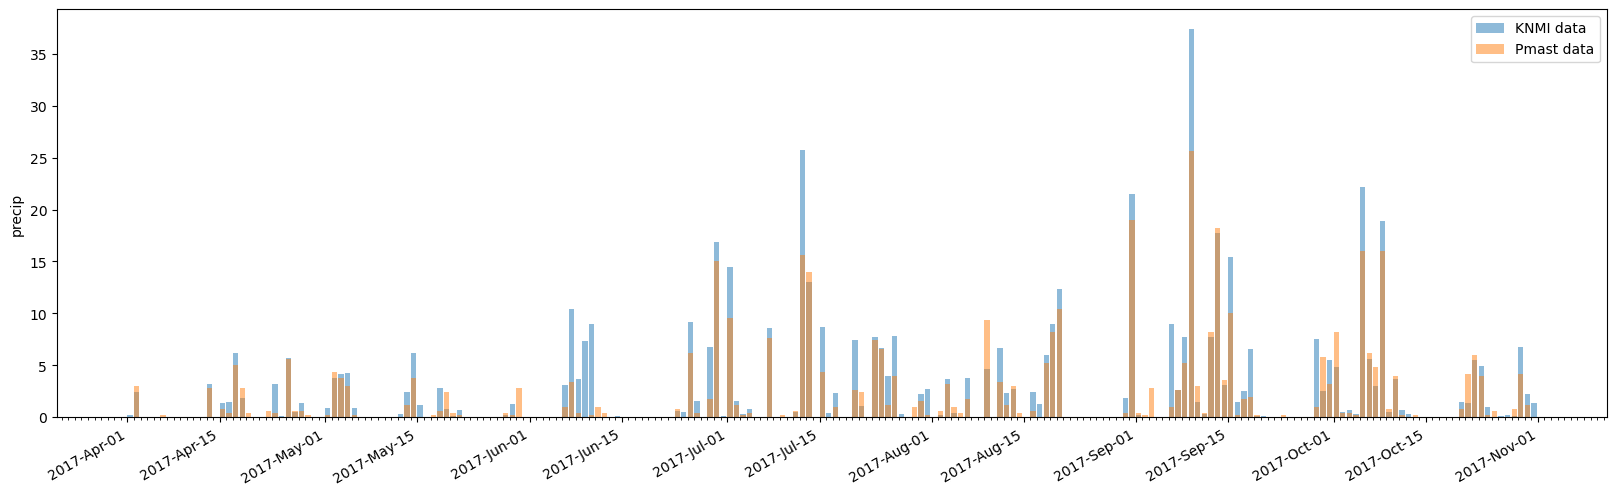

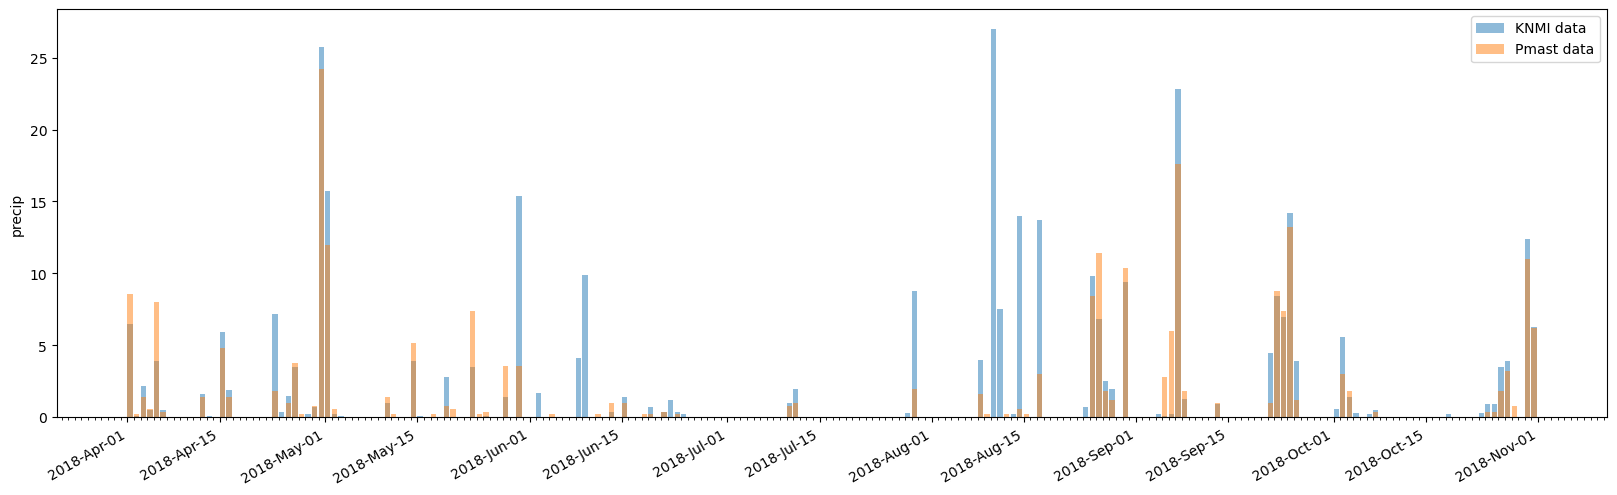

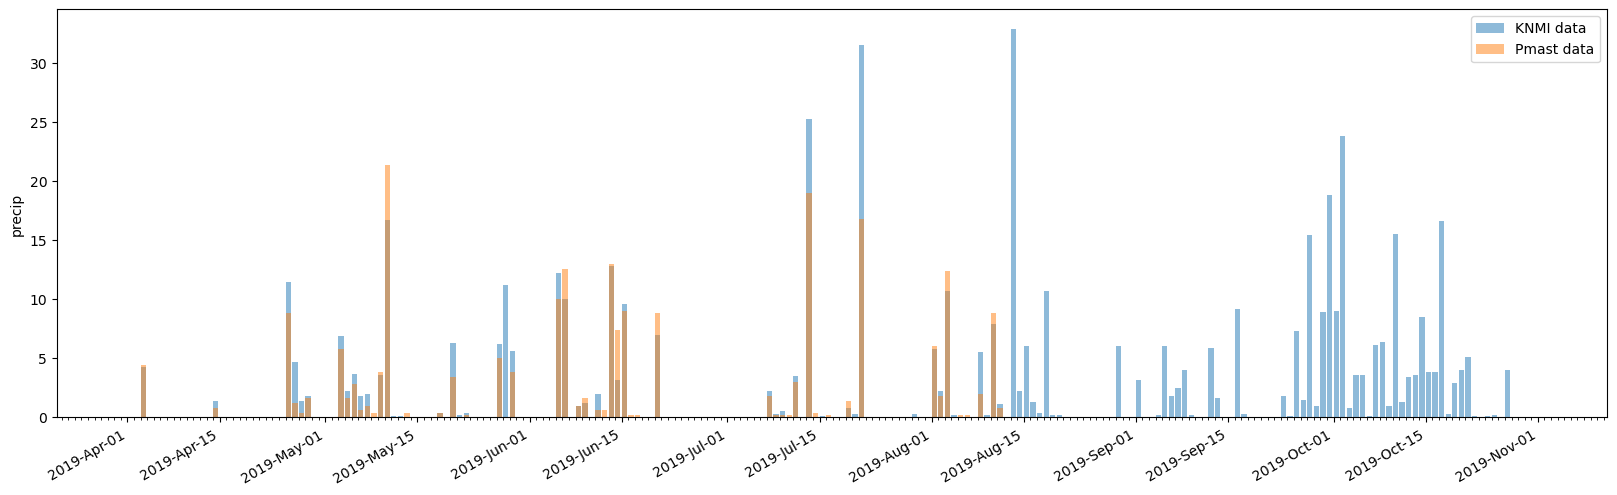

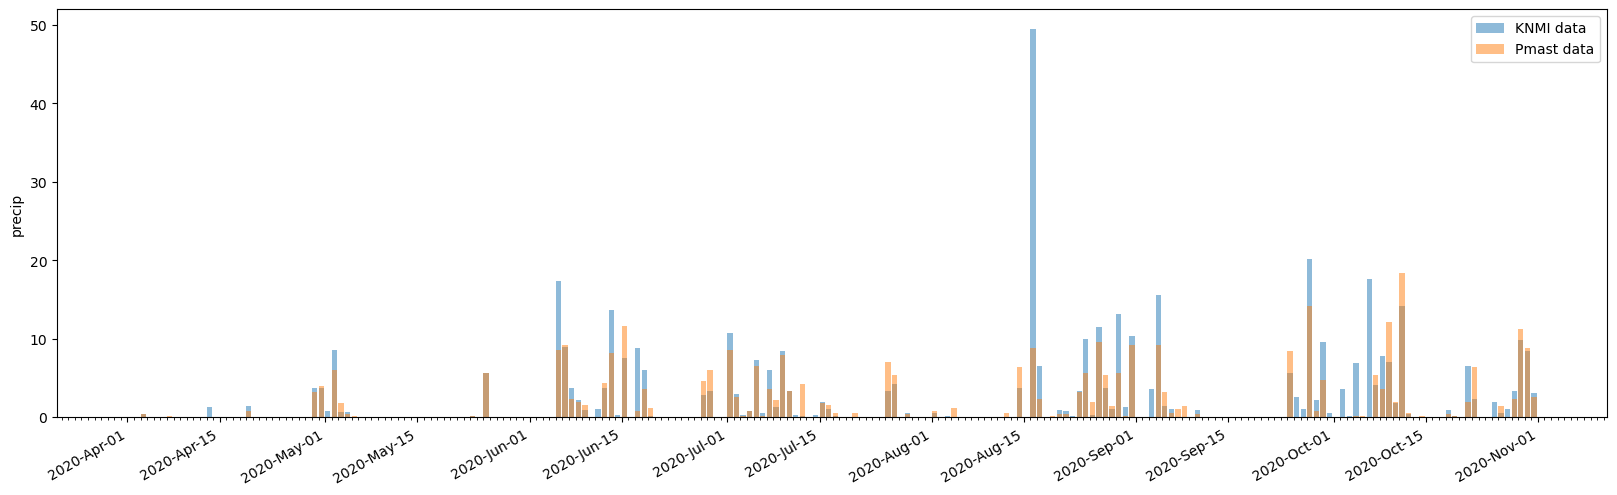

In [30]:
plt.rcParams["figure.figsize"] = (20,6)

#st="2005-04-01"
#ed="2005-09-30"

def precip_plot_wrapper(st,ed):

    fig,ax = plt.subplots()

    a=df_knmi_daily.loc[st:ed,['RD']]
    ax.bar(a.index,a['RD'],alpha=0.5, align='edge', label="KNMI data")

    b=df_Pmast_8to8.loc[st:ed,['P(mast)']]
    ax.bar(b.index,b['P(mast)'],alpha=0.5, align='edge', label="Pmast data")

    ax.set_ylabel("precip")
    
    #ax2 = ax.twinx()
    #ax2.set_ylim(0,5)
    #ax2.set_ylabel("fstr")
    #ax2.set_yscale('log')
    #ax2.scatter(c.index,c['LE/ET'],c=np.where(c['LE/ET']<1,'b','r'))
    
    ax.legend()
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=[1,15]))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b-%d'))
    fig.autofmt_xdate()



for year in range(2001,2021):
    st=str(year)+"-04-01"
    ed=str(year)+"-10-31"
    precip_plot_wrapper(st,ed)

## Visualize difference in precip_deficit in EC en knmi

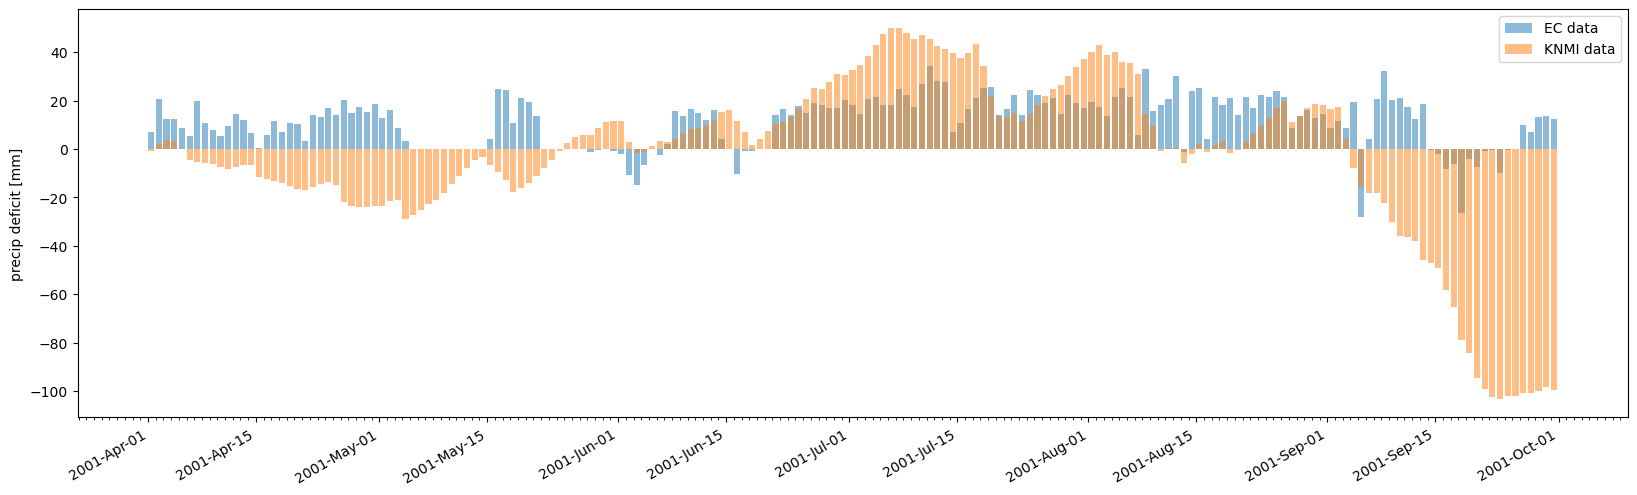

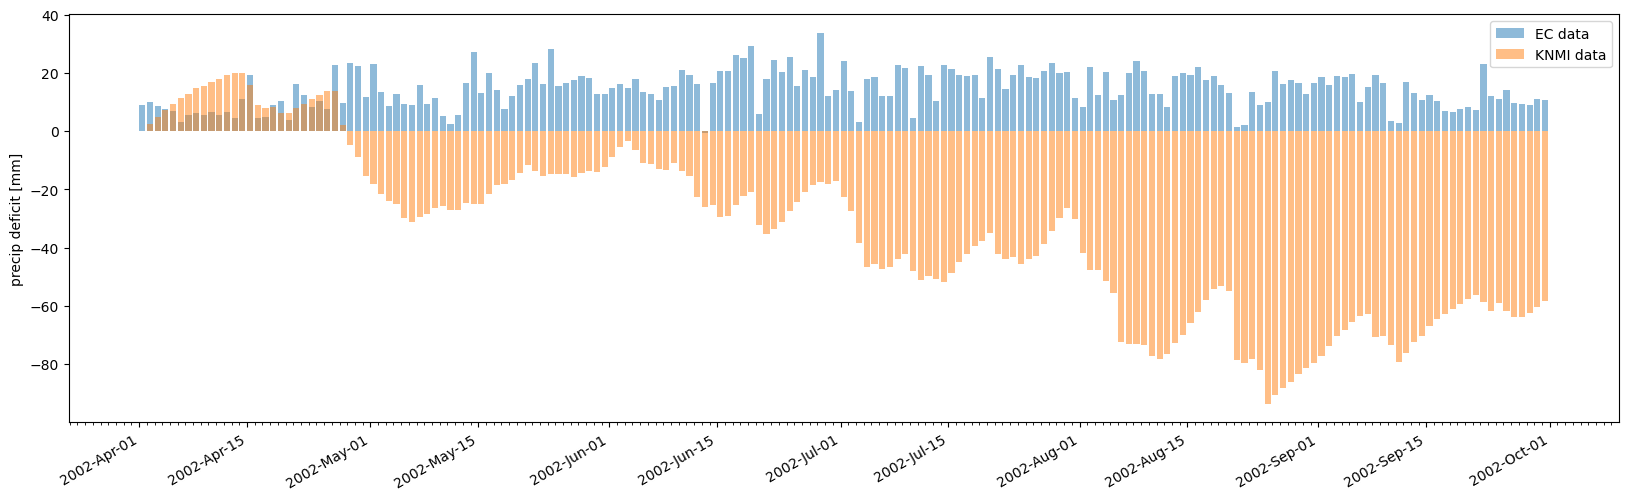

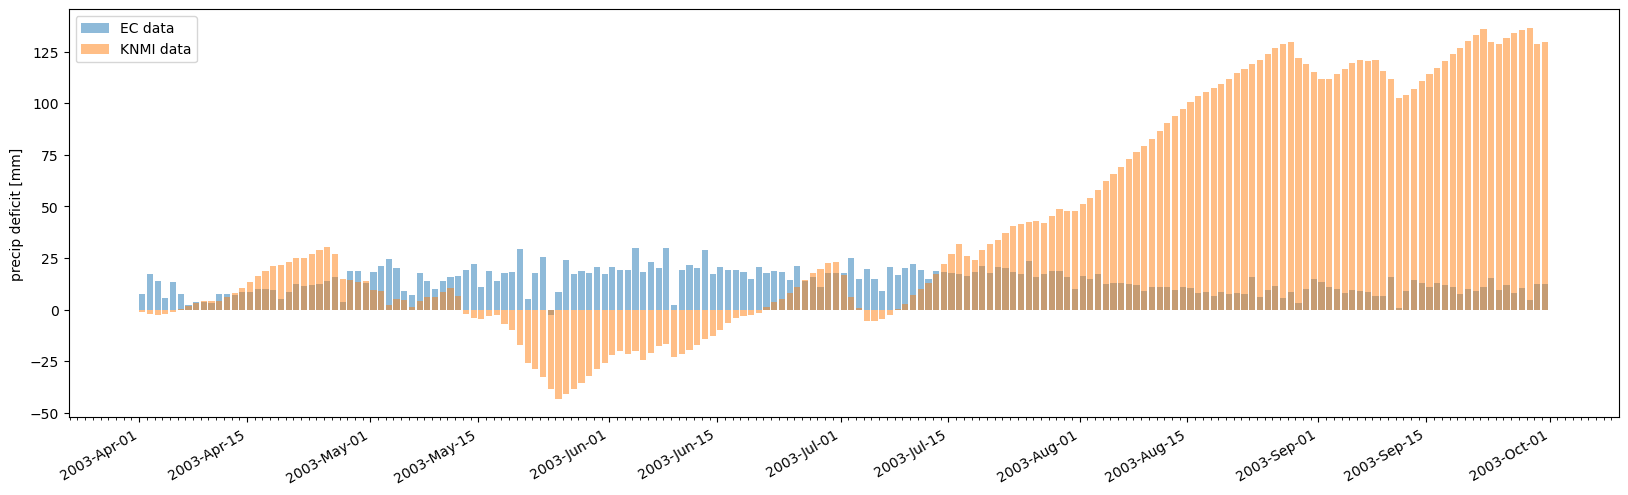

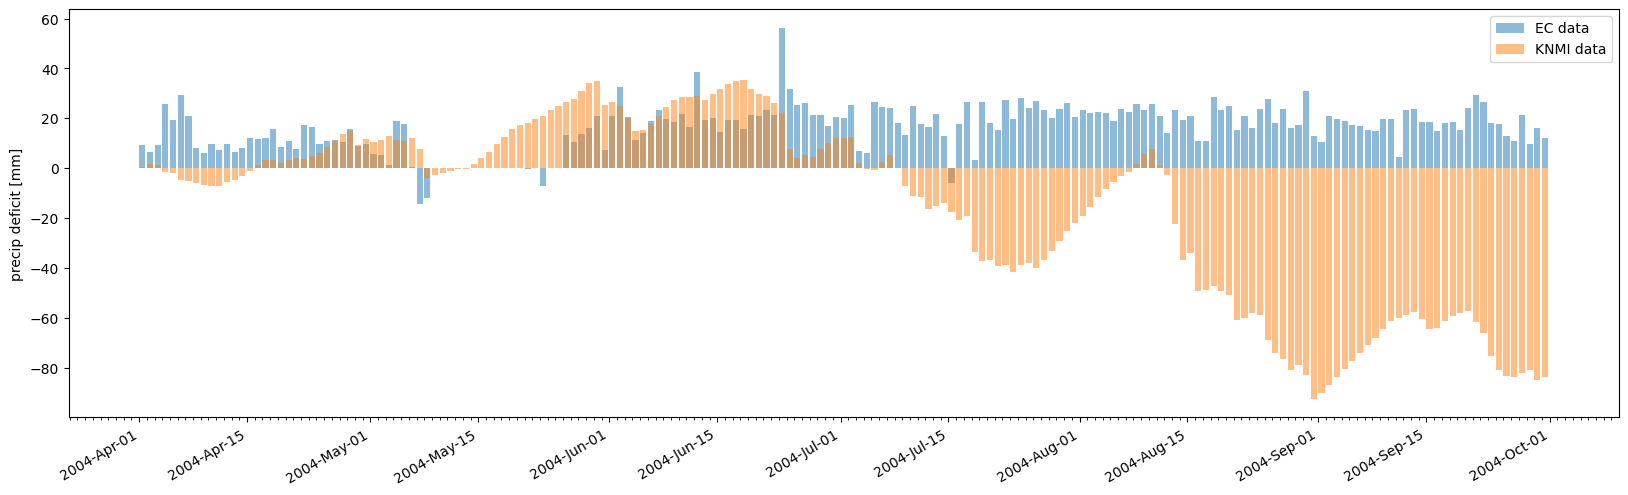

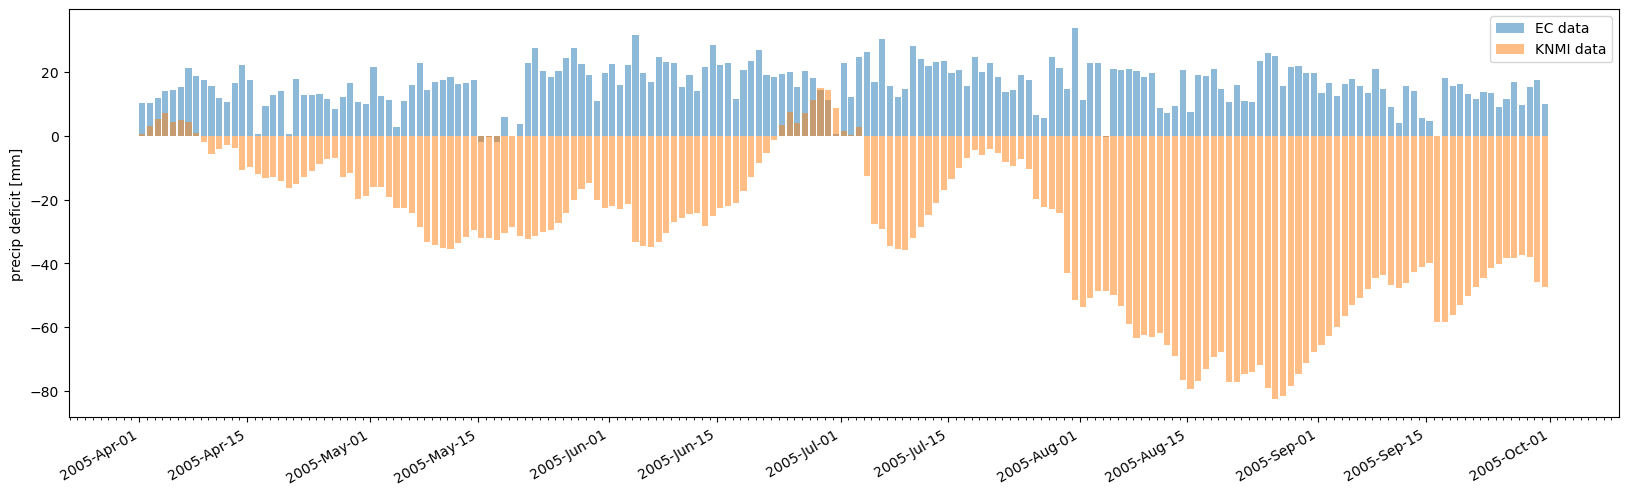

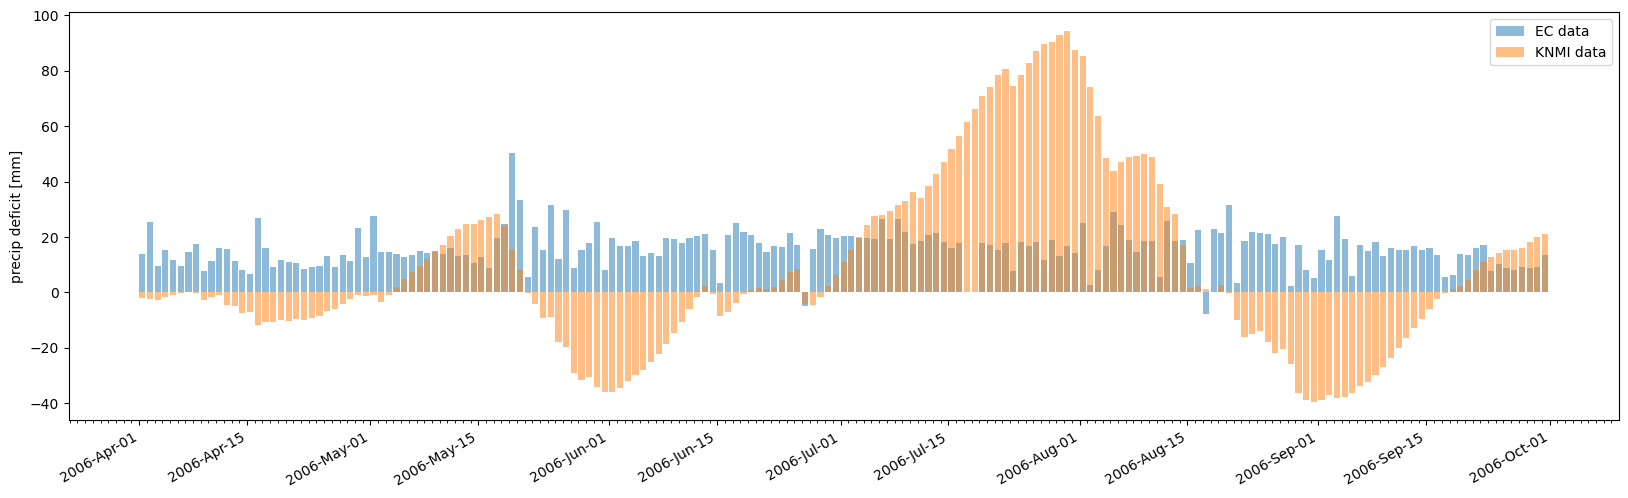

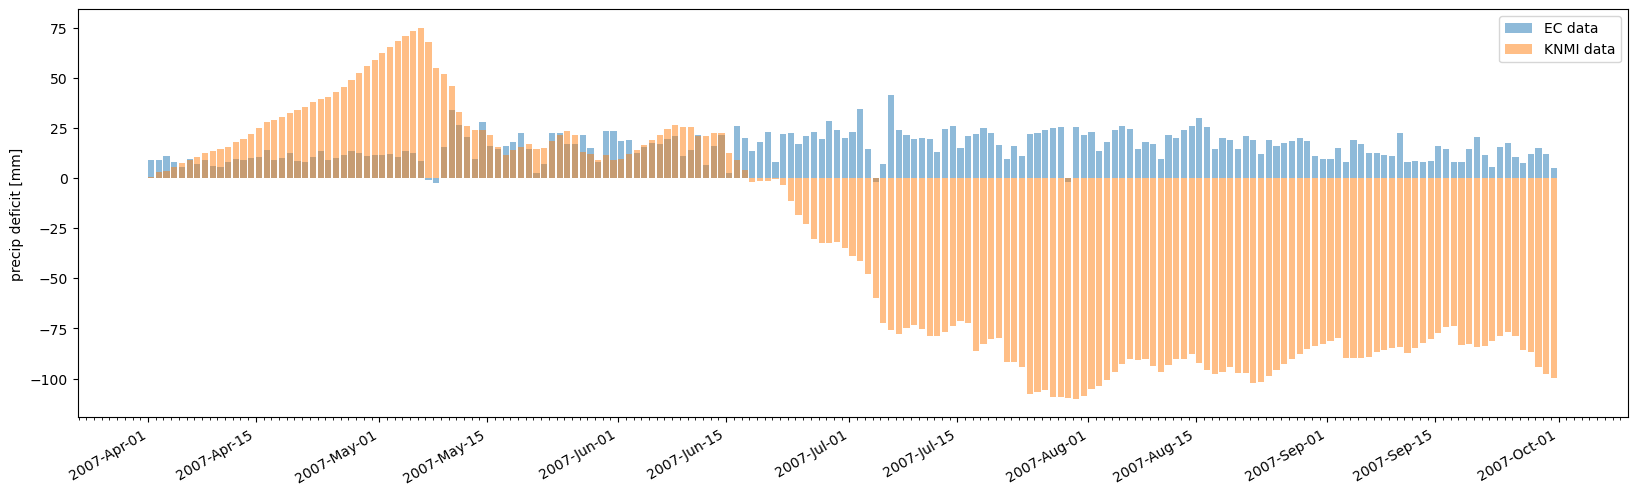

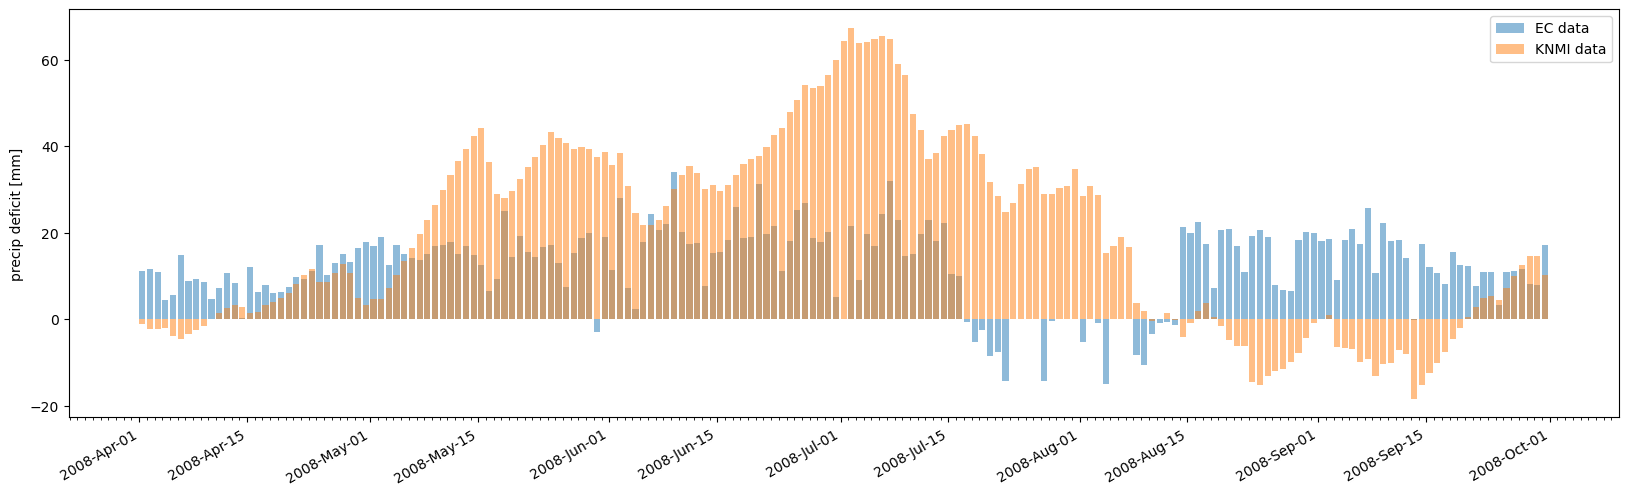

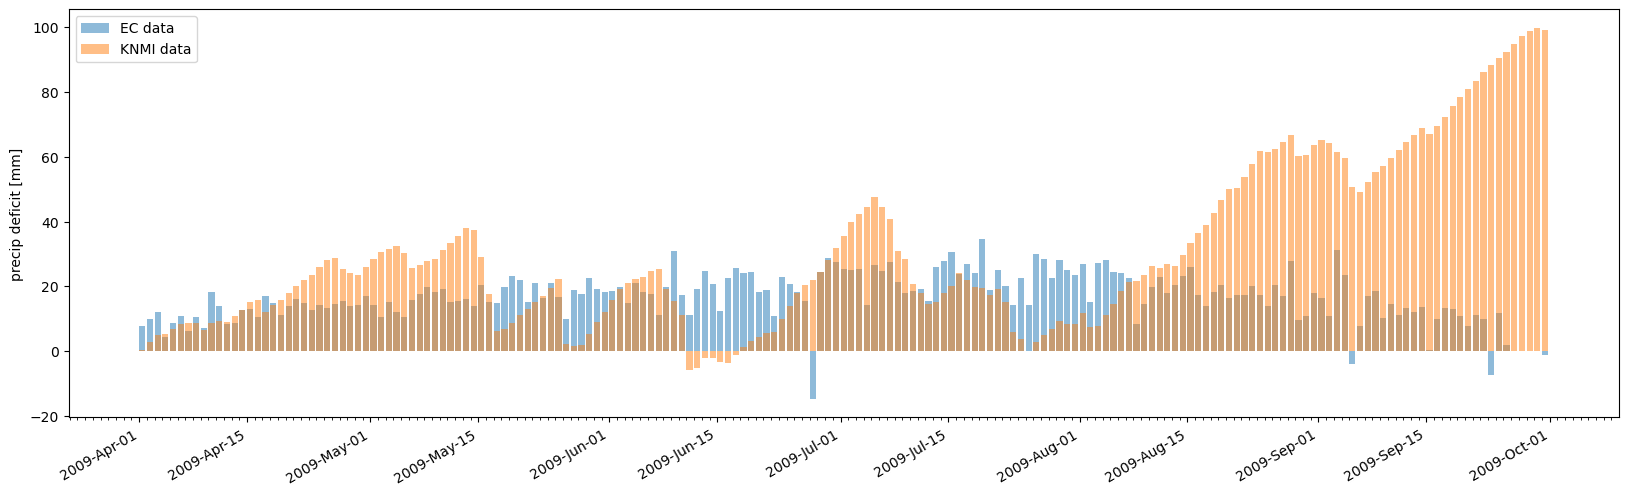

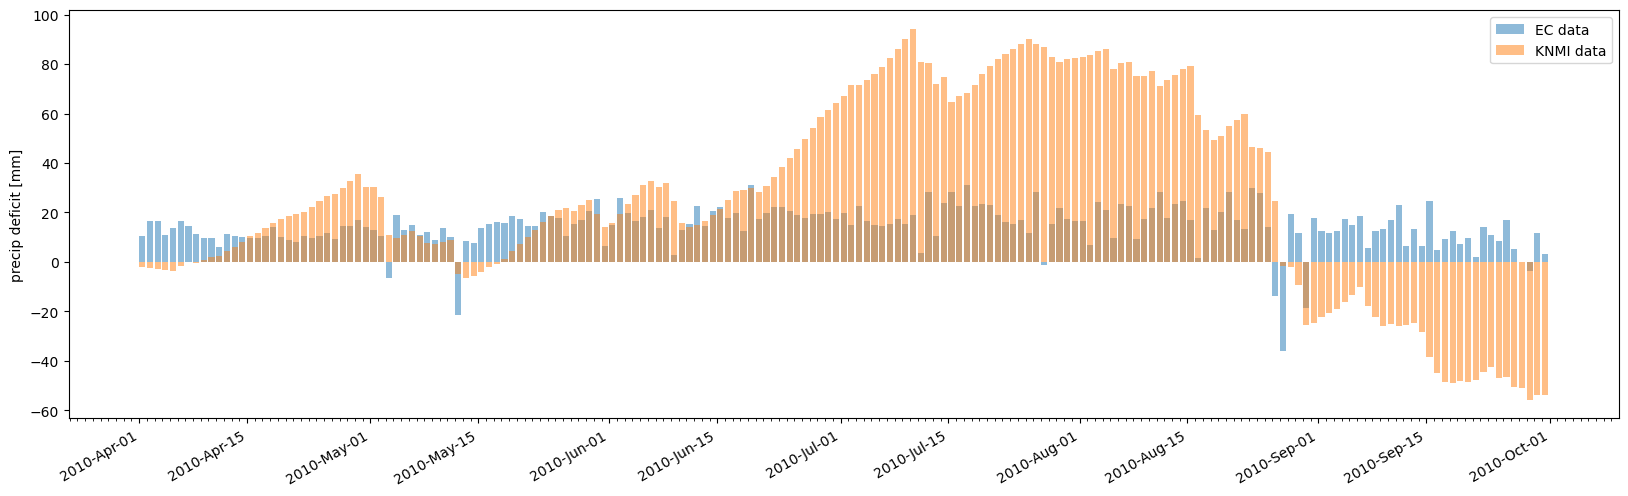

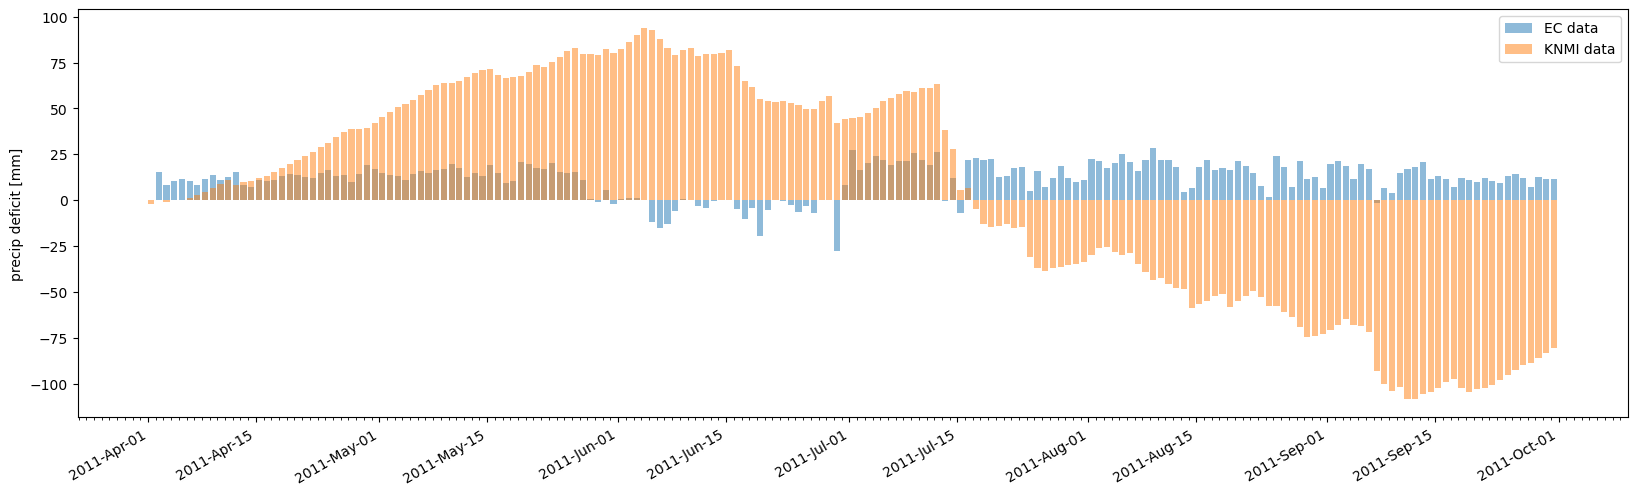

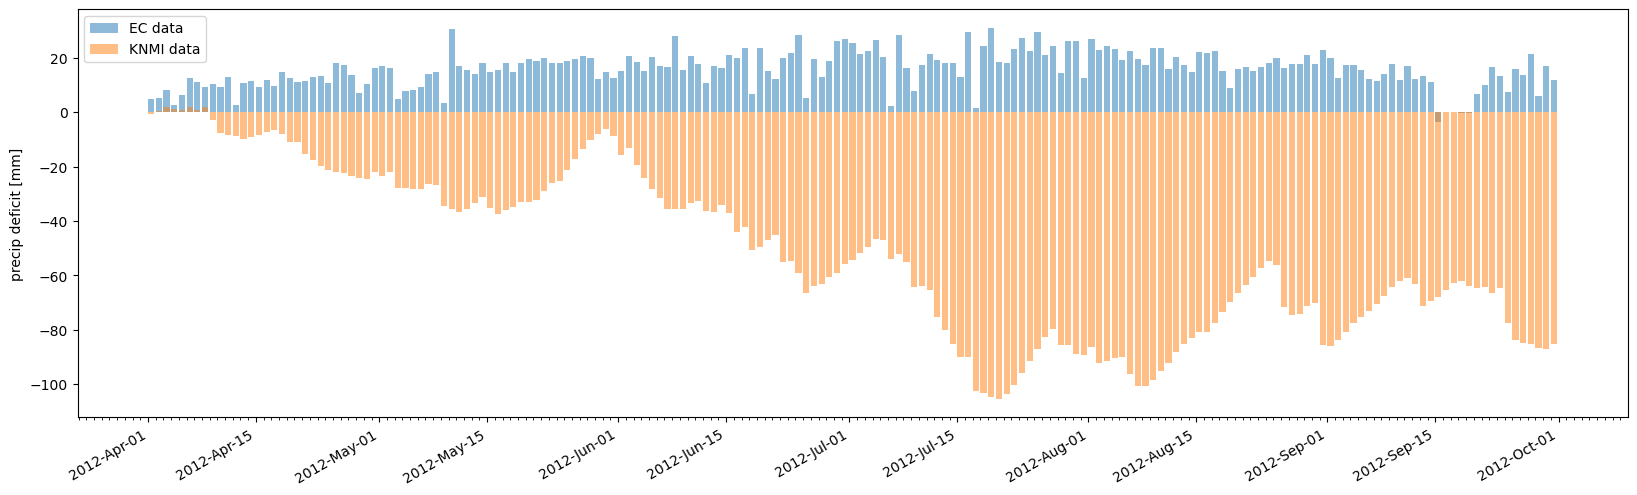

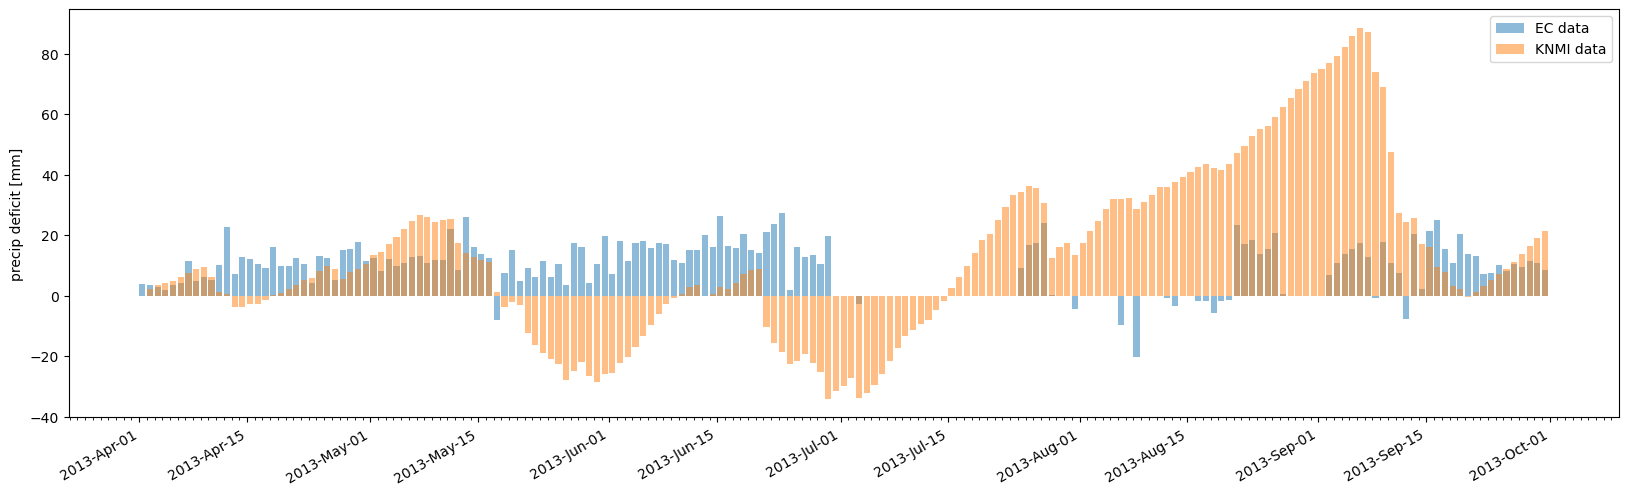

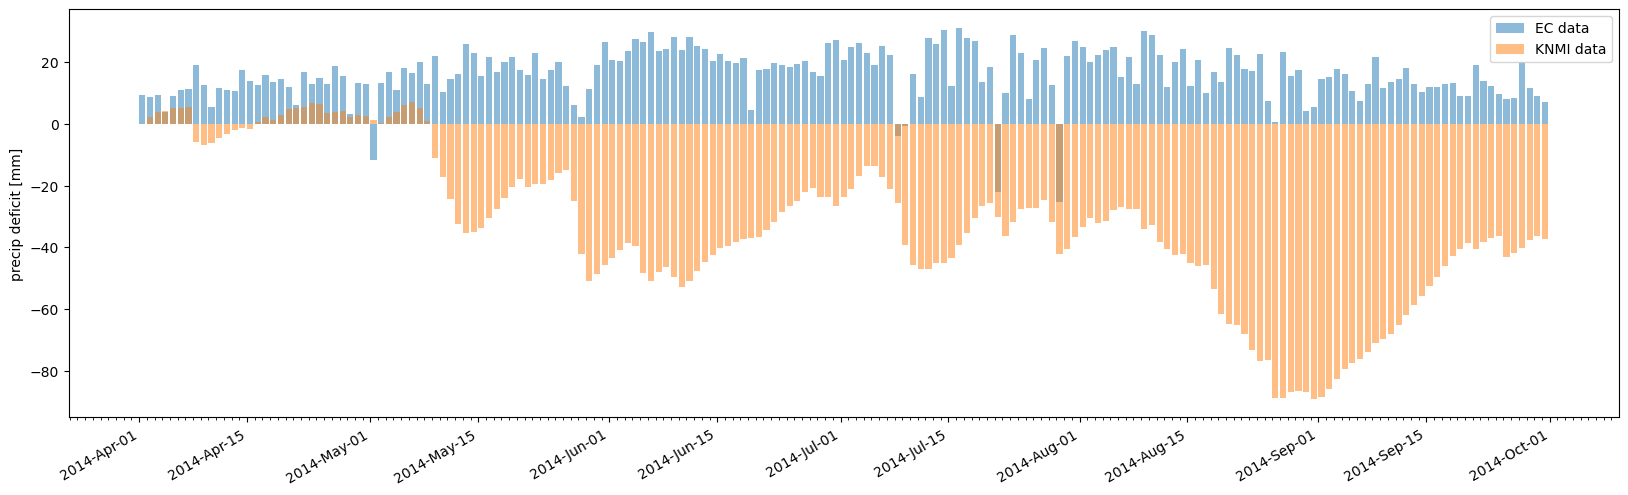

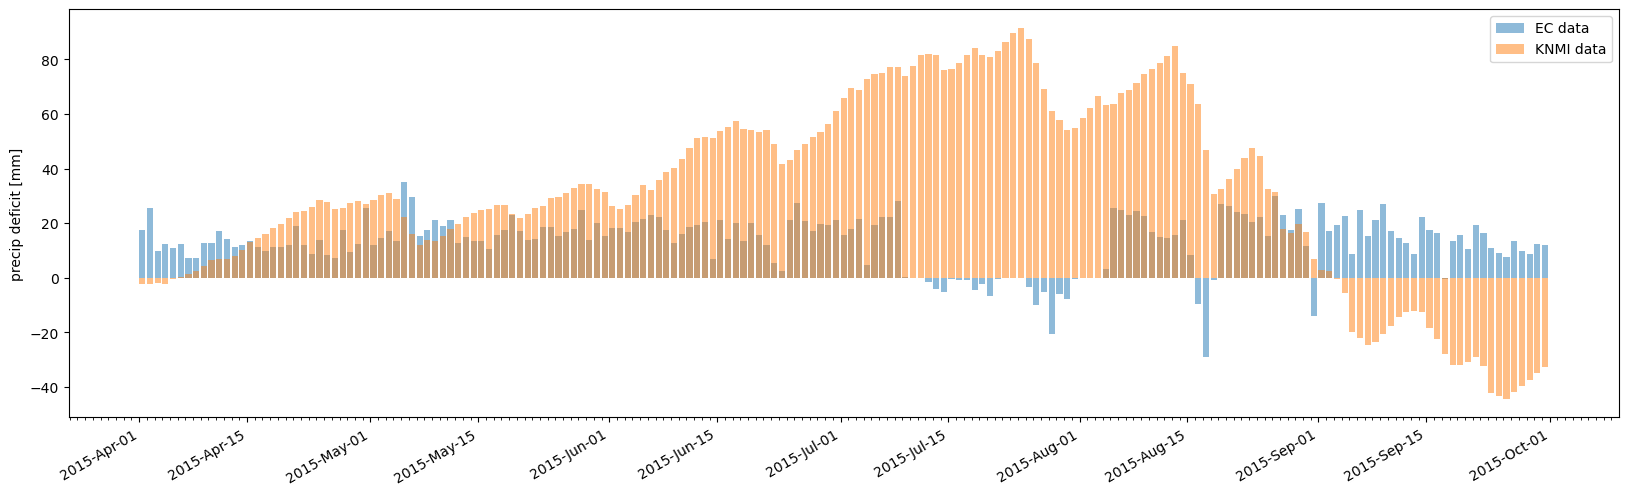

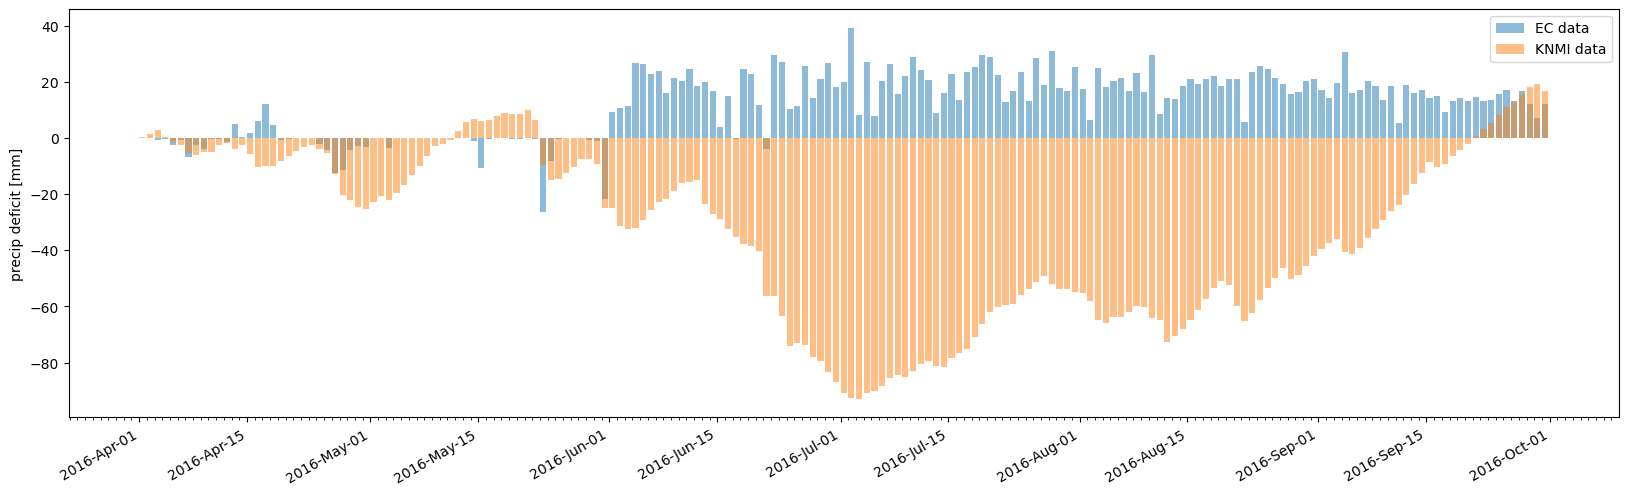

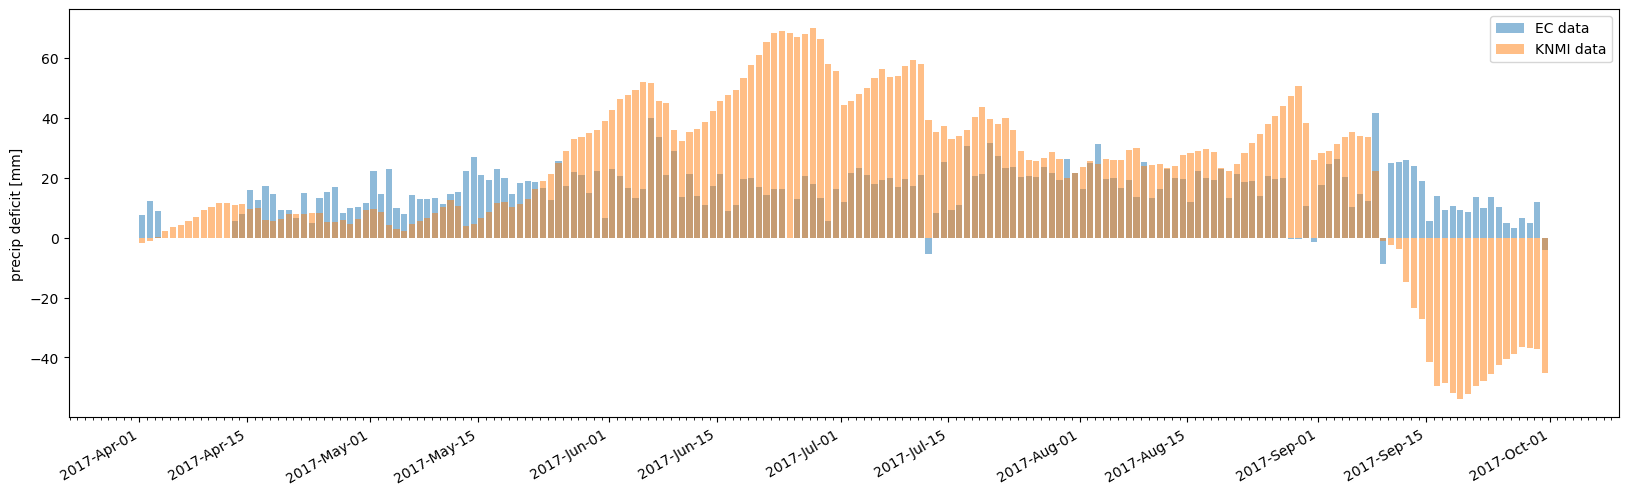

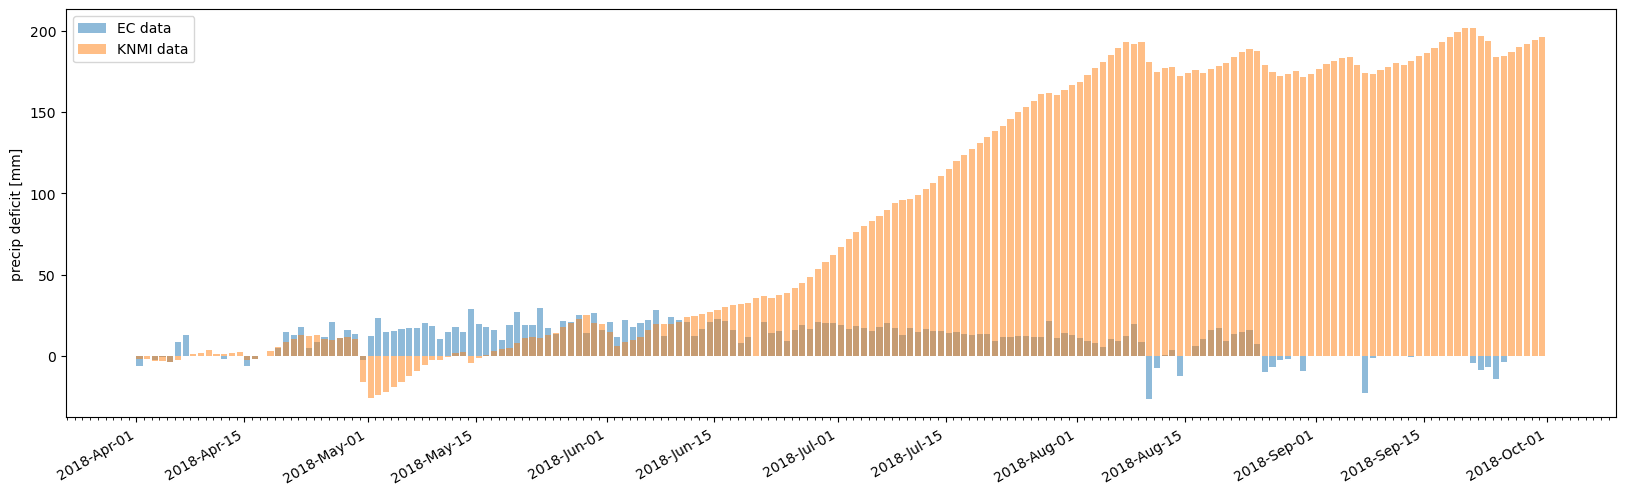

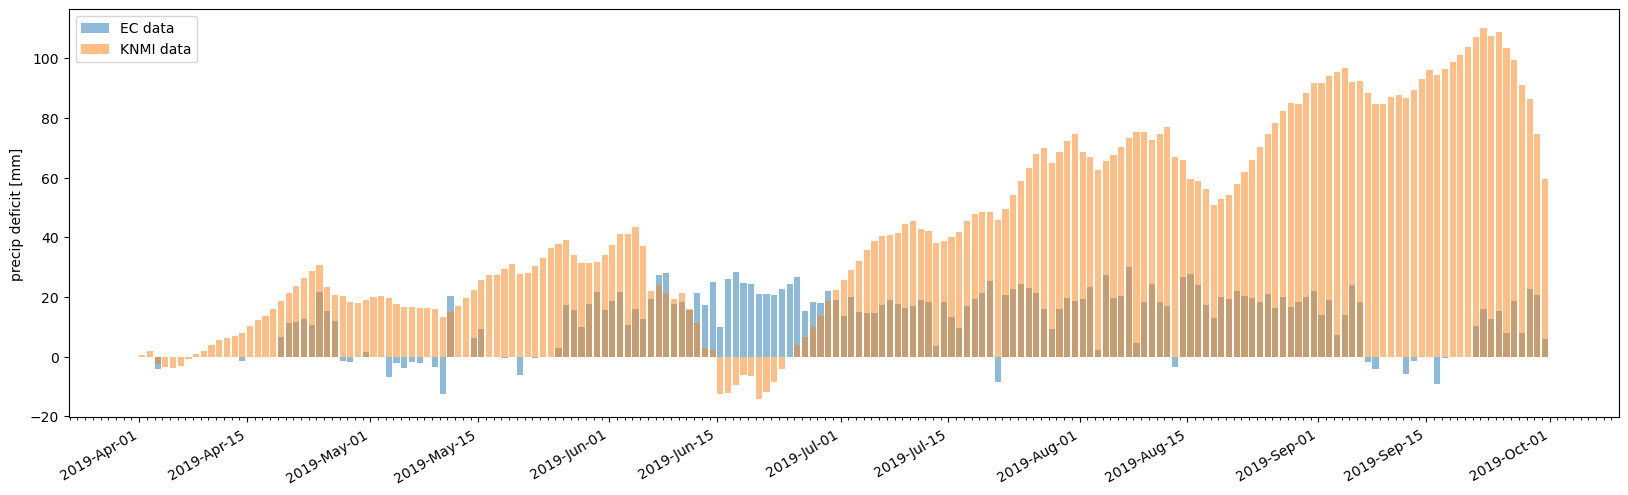

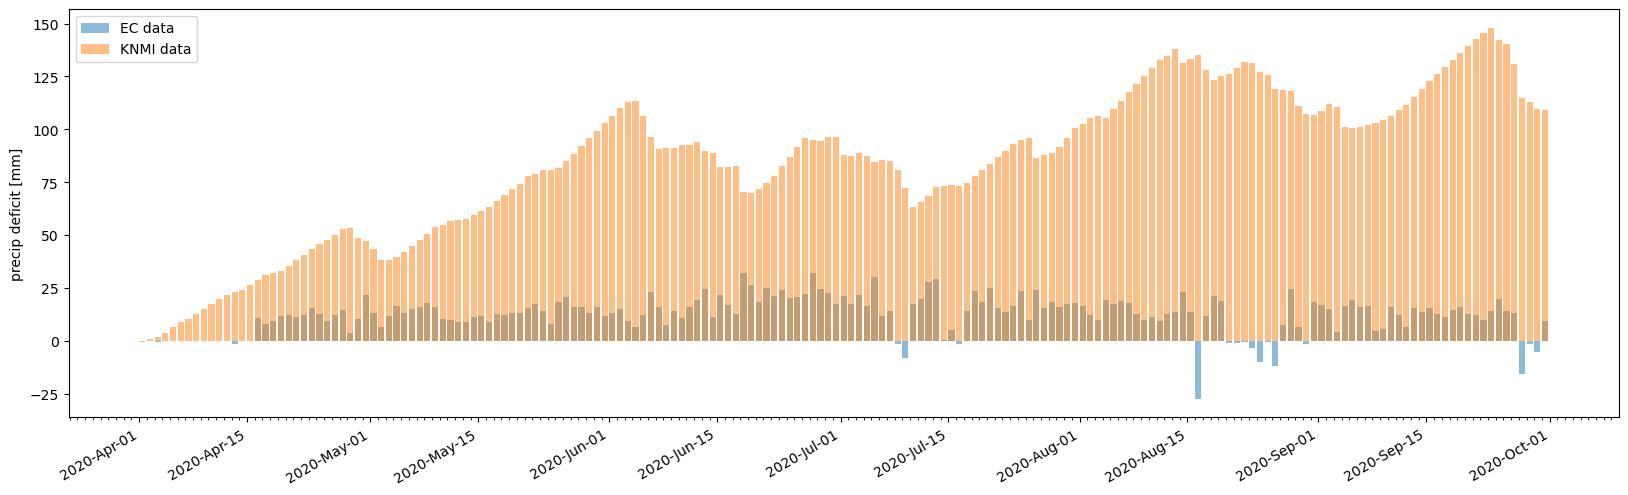

In [31]:
plt.rcParams["figure.figsize"] = (20,6)

#st="2005-04-01"
#ed="2005-09-30"

def precip_plot_wrapper(st,ed):

    fig,ax = plt.subplots()

    a=df_Pdef.loc[st:ed,['Loo_deficit']]
    ax.bar(a.index,a['Loo_deficit'],alpha=0.5, align='edge', label="EC data")

    b=df_Pdef.loc[st:ed,['deficit']]
    ax.bar(b.index,b['deficit'],alpha=0.5, align='edge', label="KNMI data")

    ax.set_ylabel("precip deficit [mm]")
    
    #ax2 = ax.twinx()
    #ax2.set_ylim(0,5)
    #ax2.set_ylabel("fstr")
    #ax2.set_yscale('log')
    #ax2.scatter(c.index,c['LE/ET'],c=np.where(c['LE/ET']<1,'b','r'))
    
    ax.legend()
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=[1,15]))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b-%d'))
    fig.autofmt_xdate()



for year in range(2001,2021):
    st=str(year)+"-04-01"
    ed=str(year)+"-10-31"
    precip_plot_wrapper(st,ed)

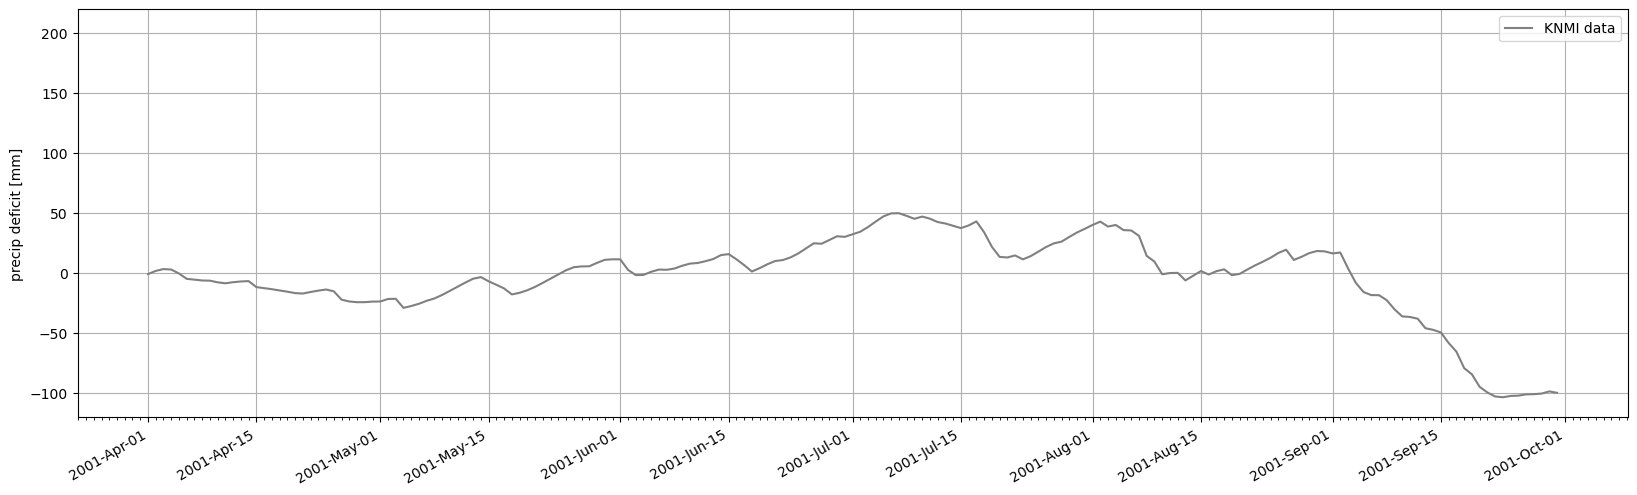

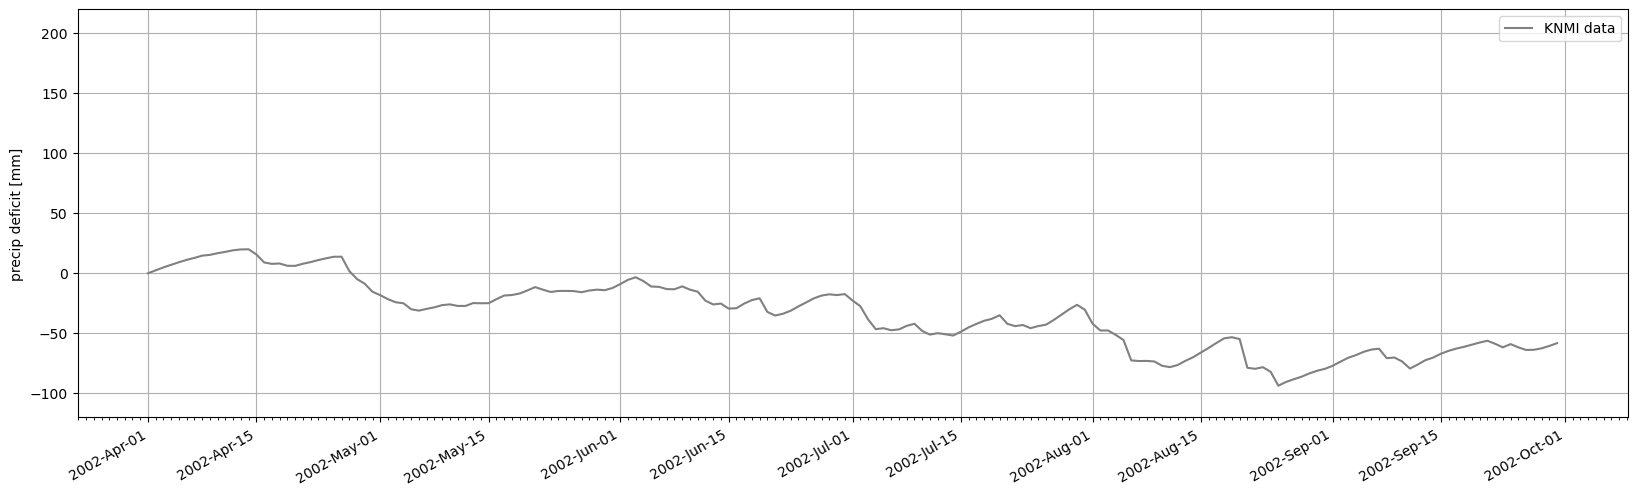

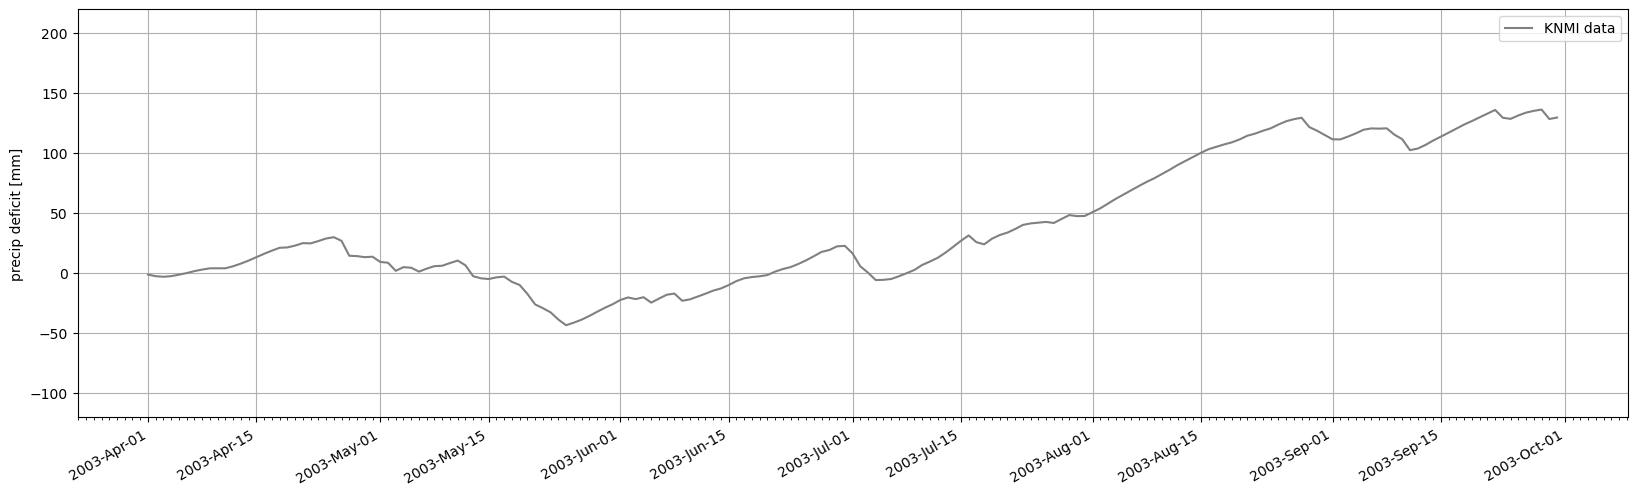

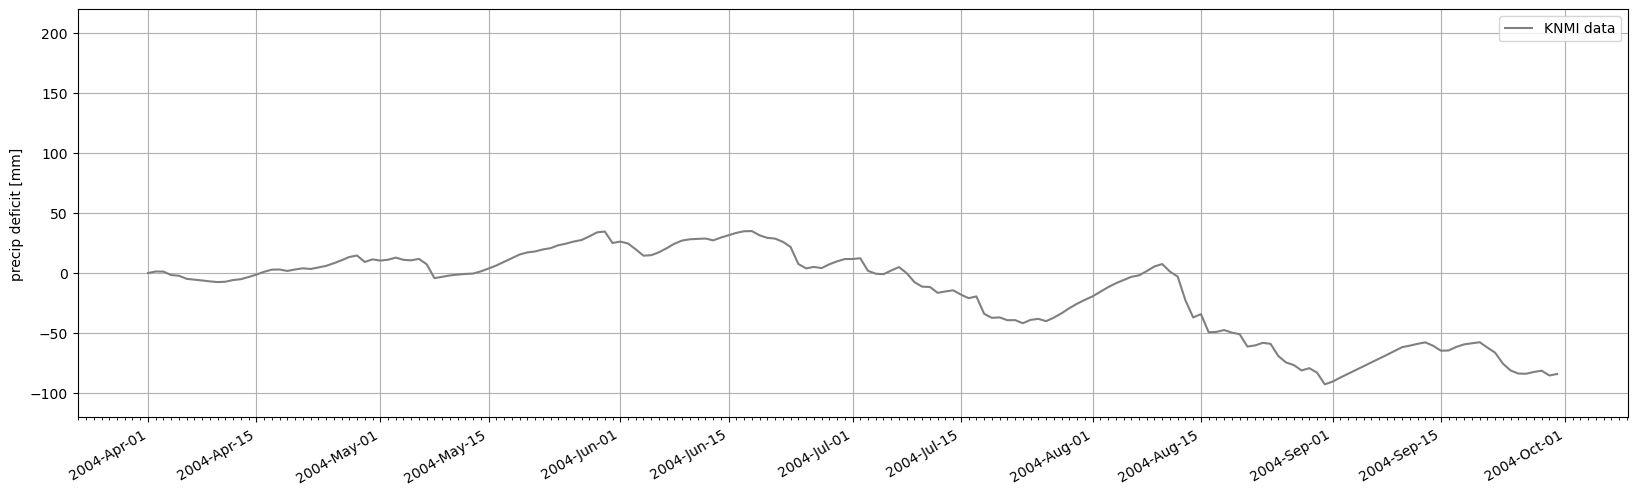

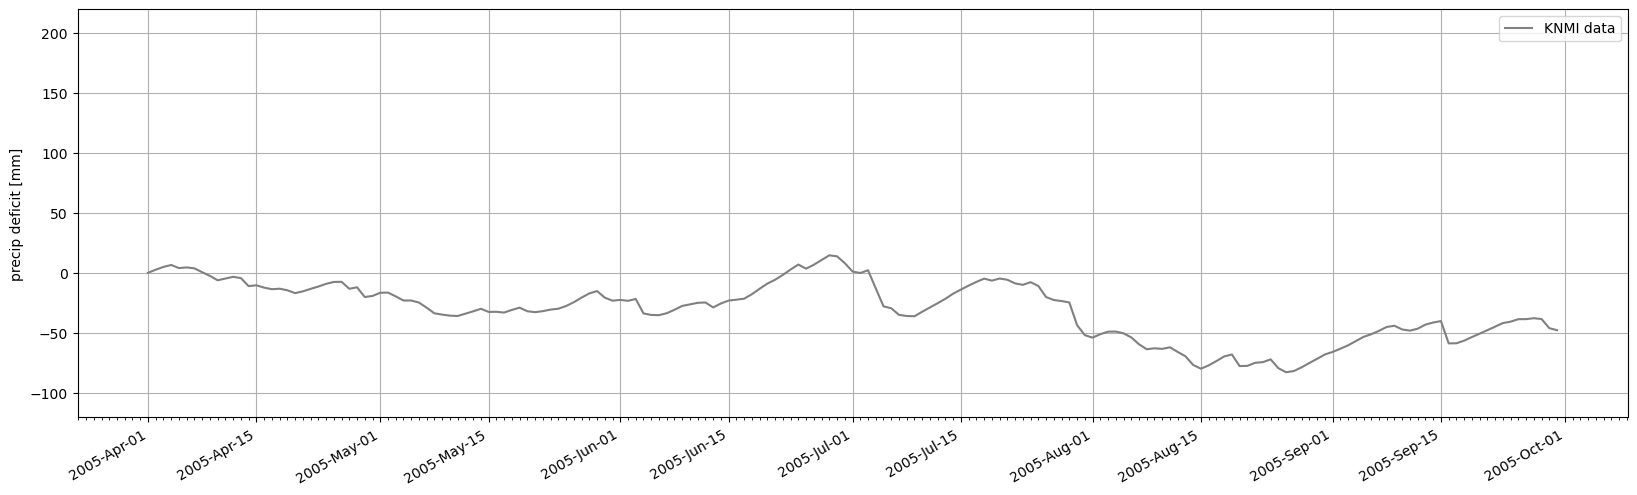

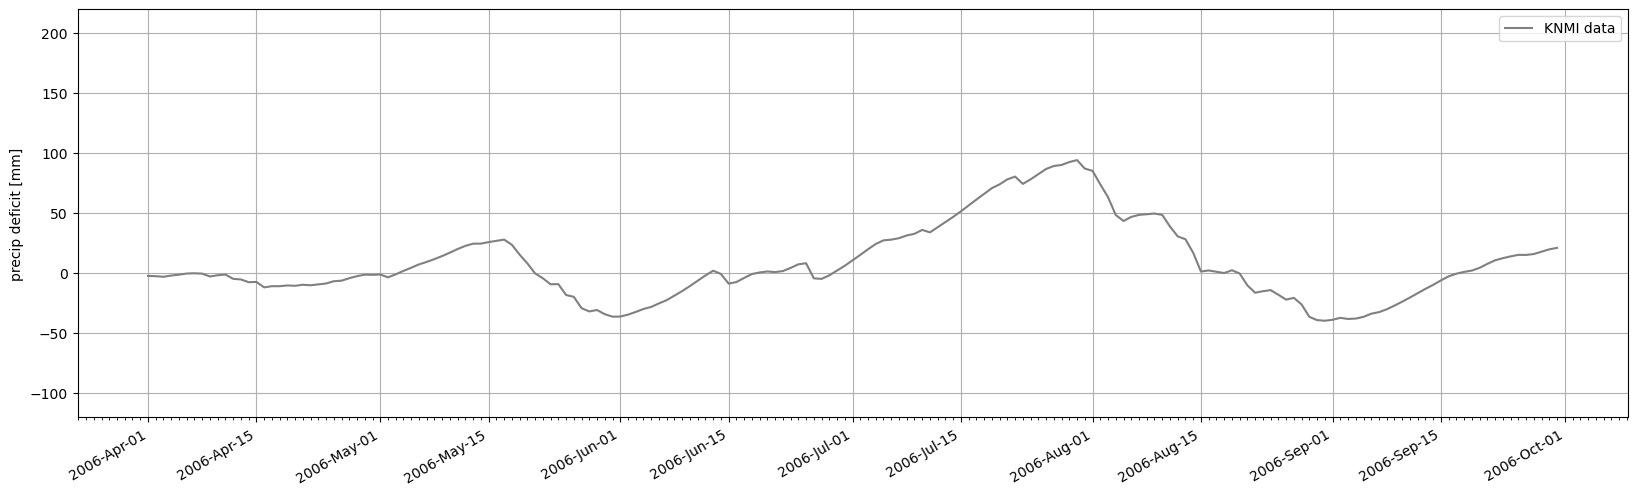

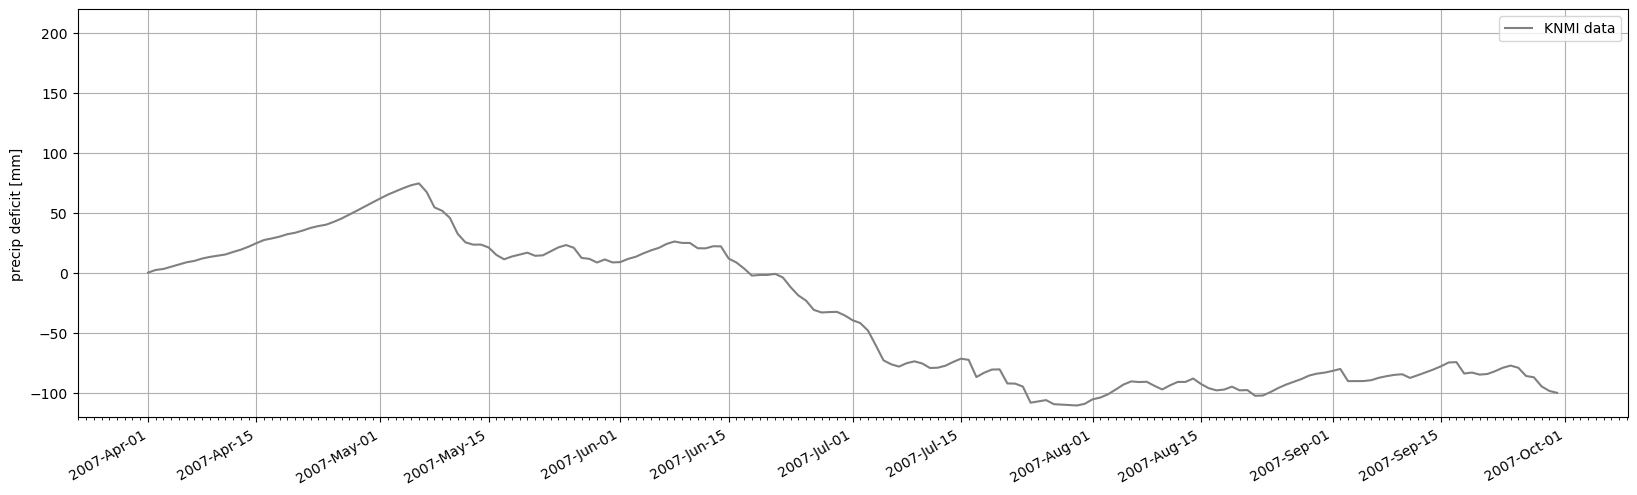

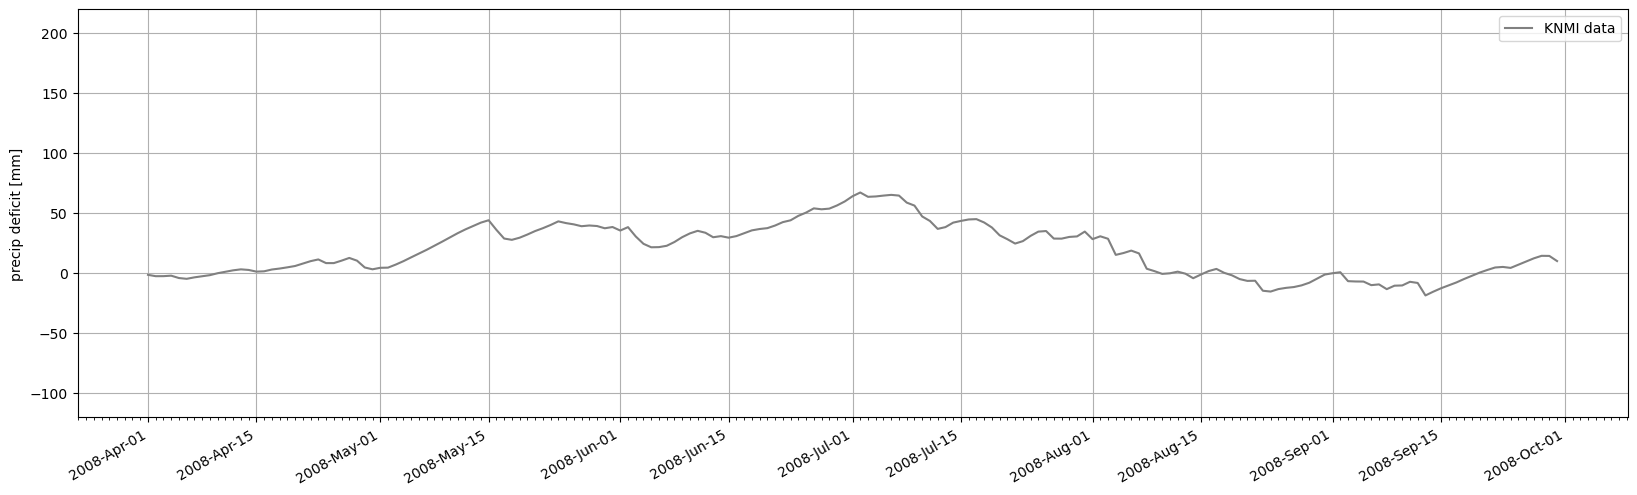

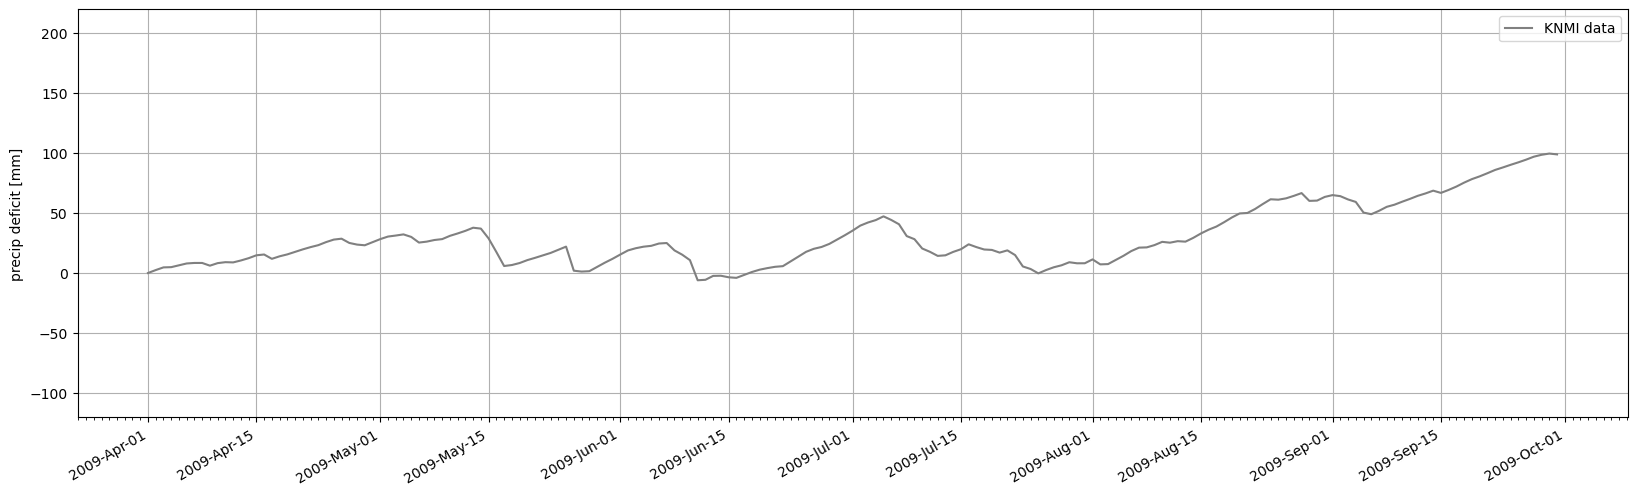

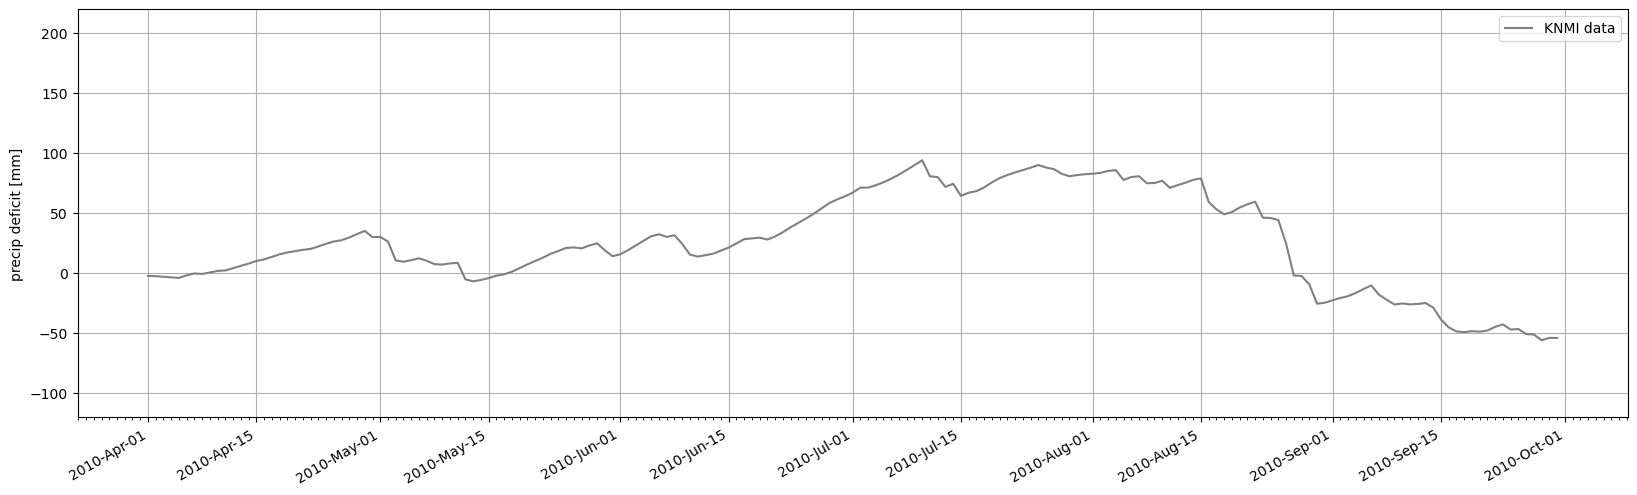

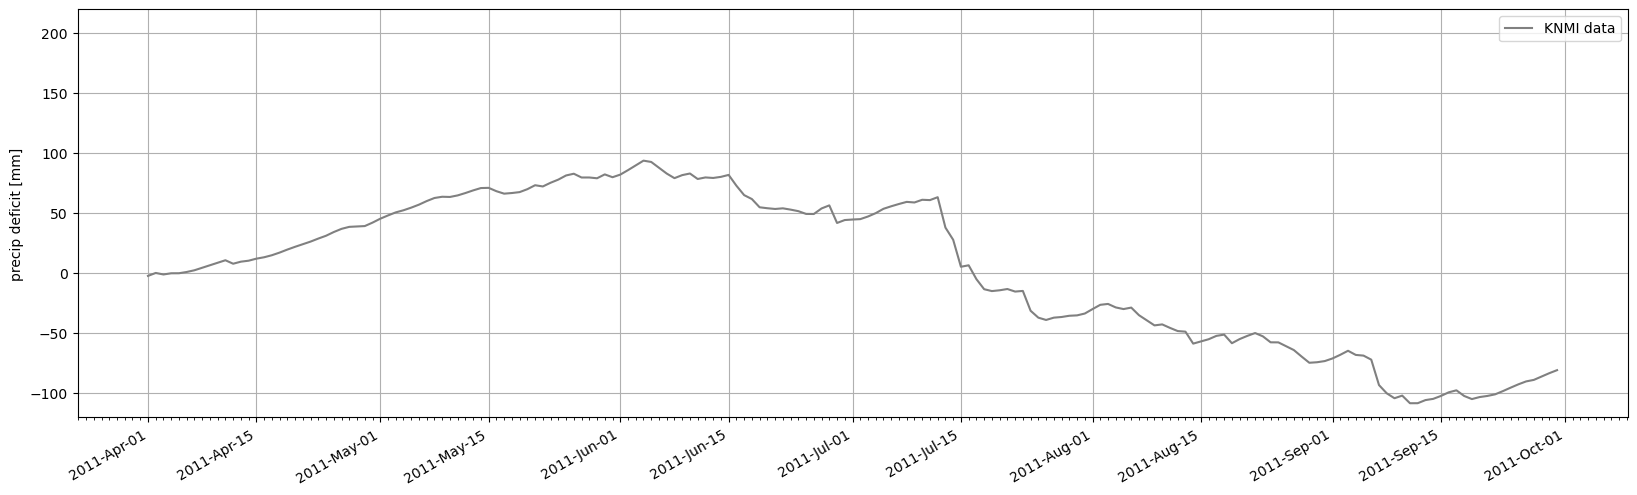

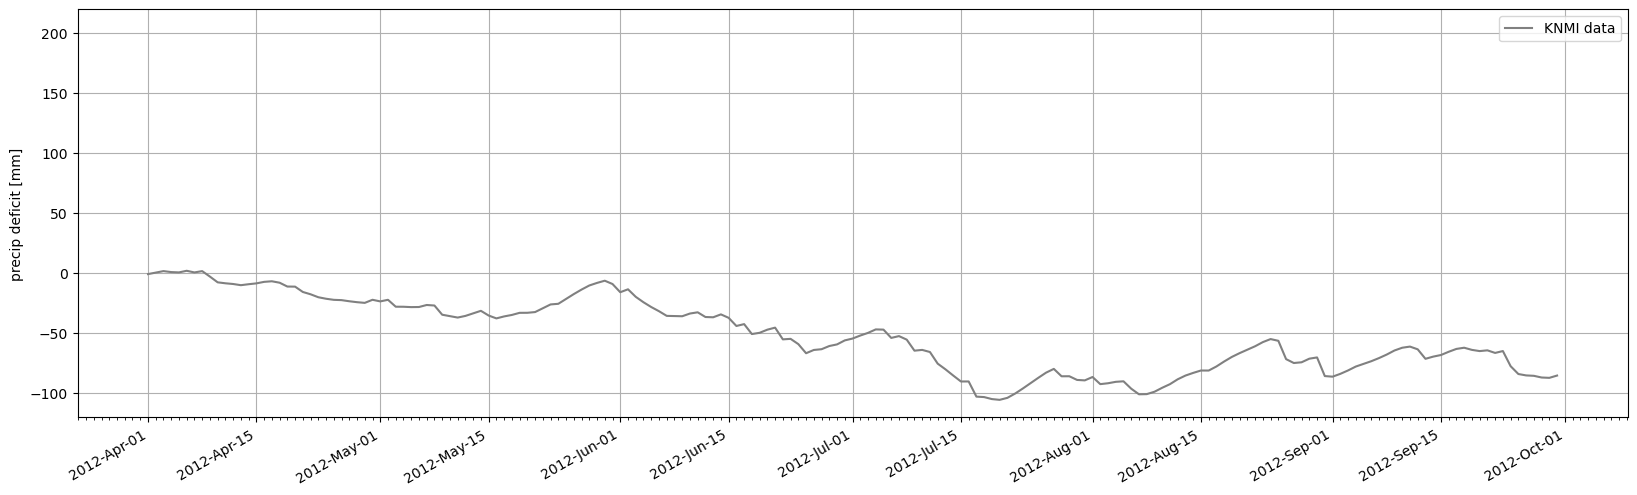

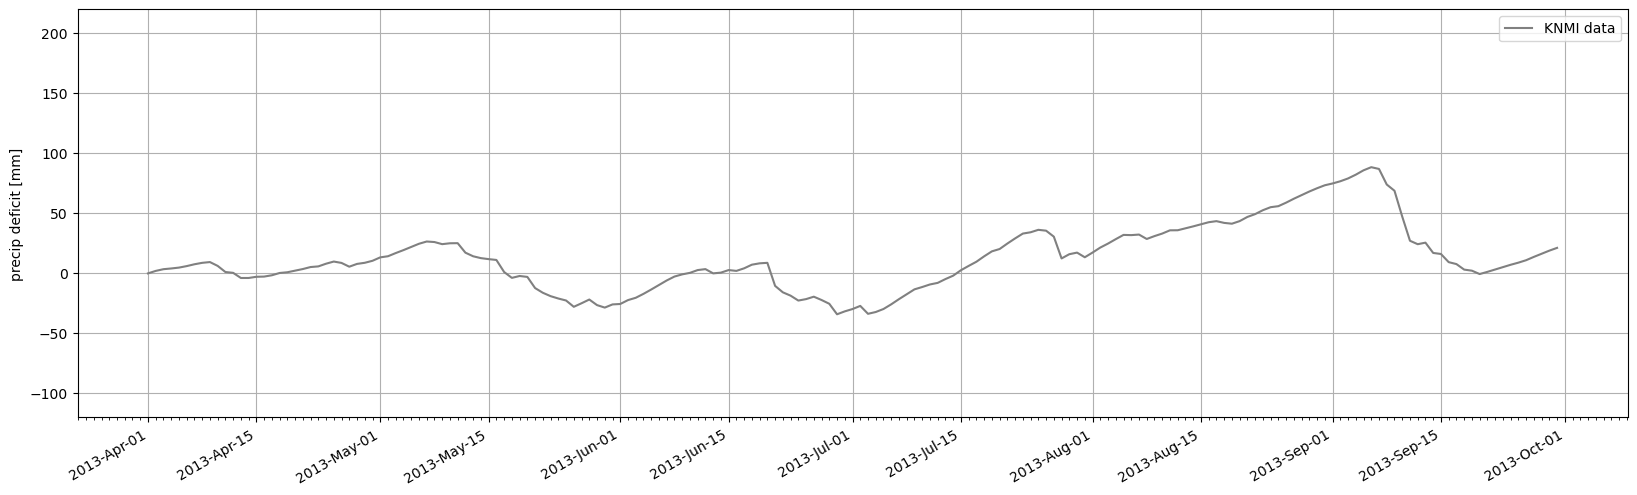

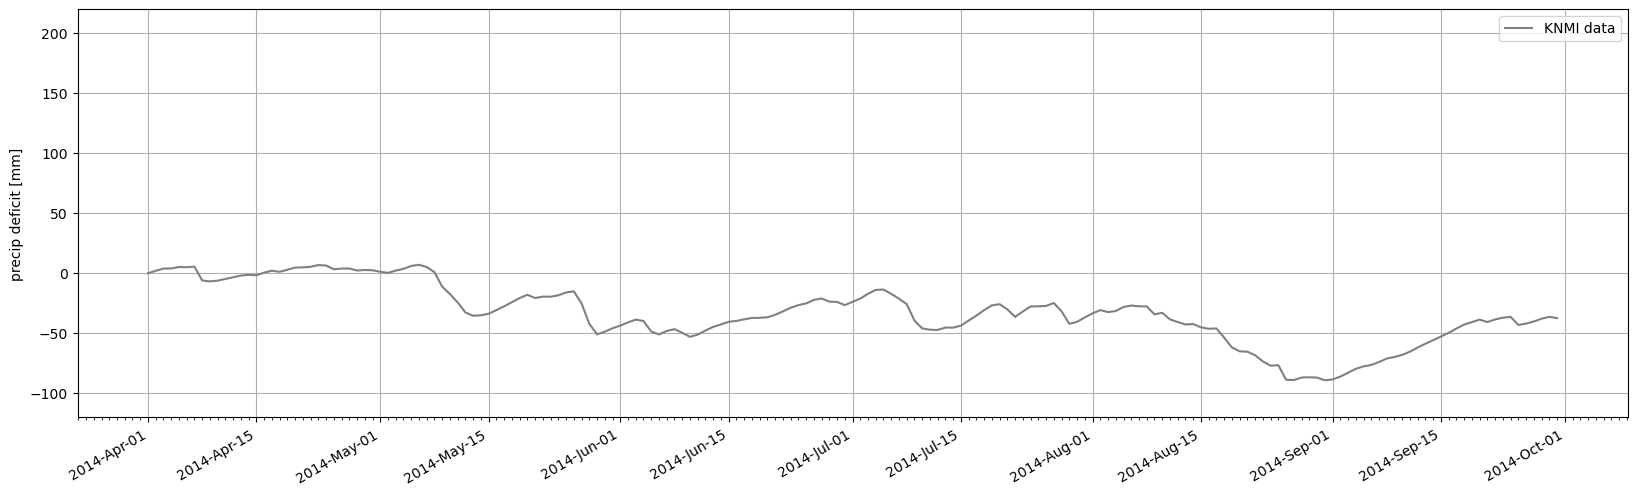

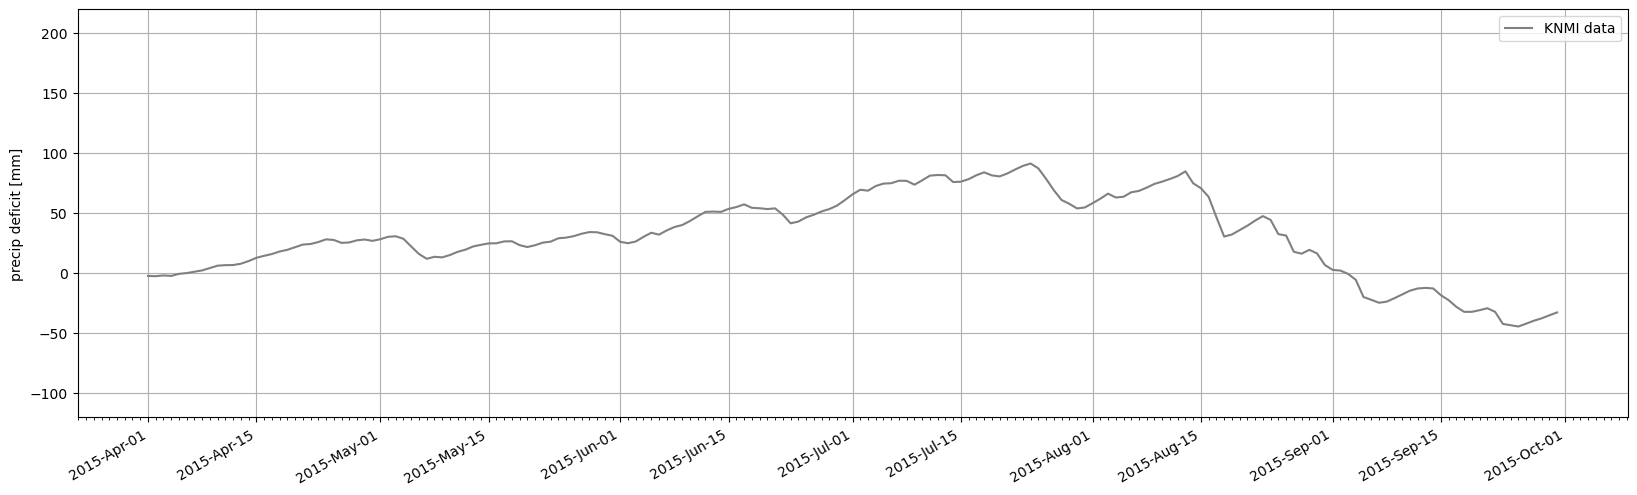

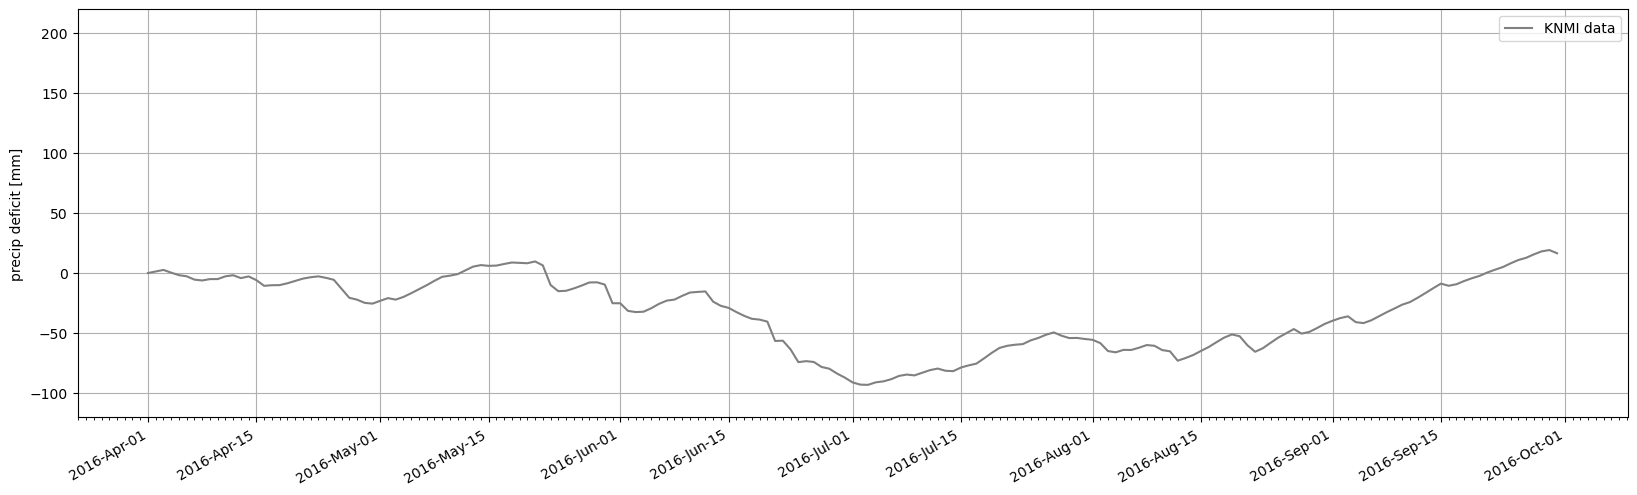

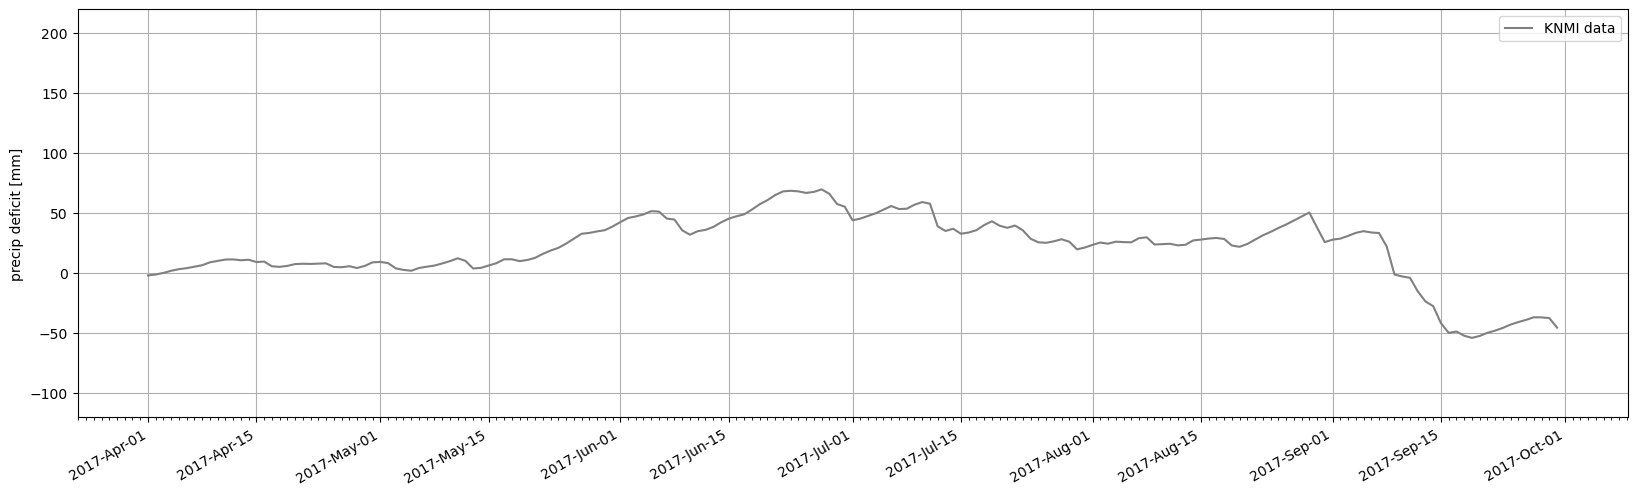

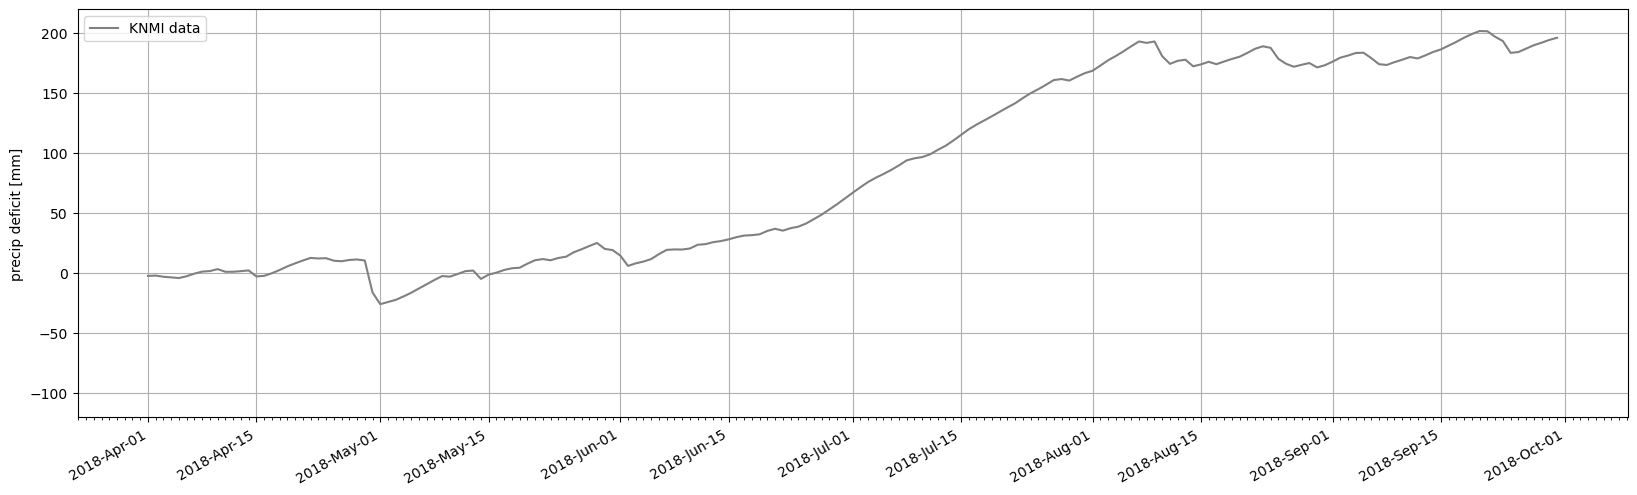

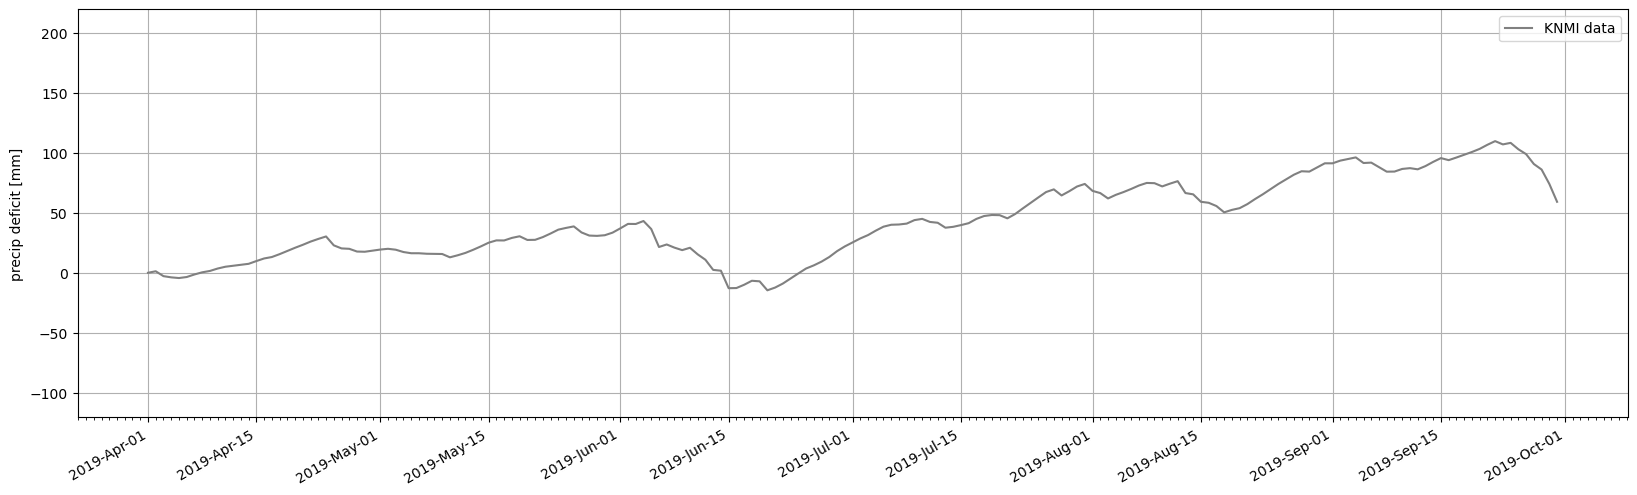

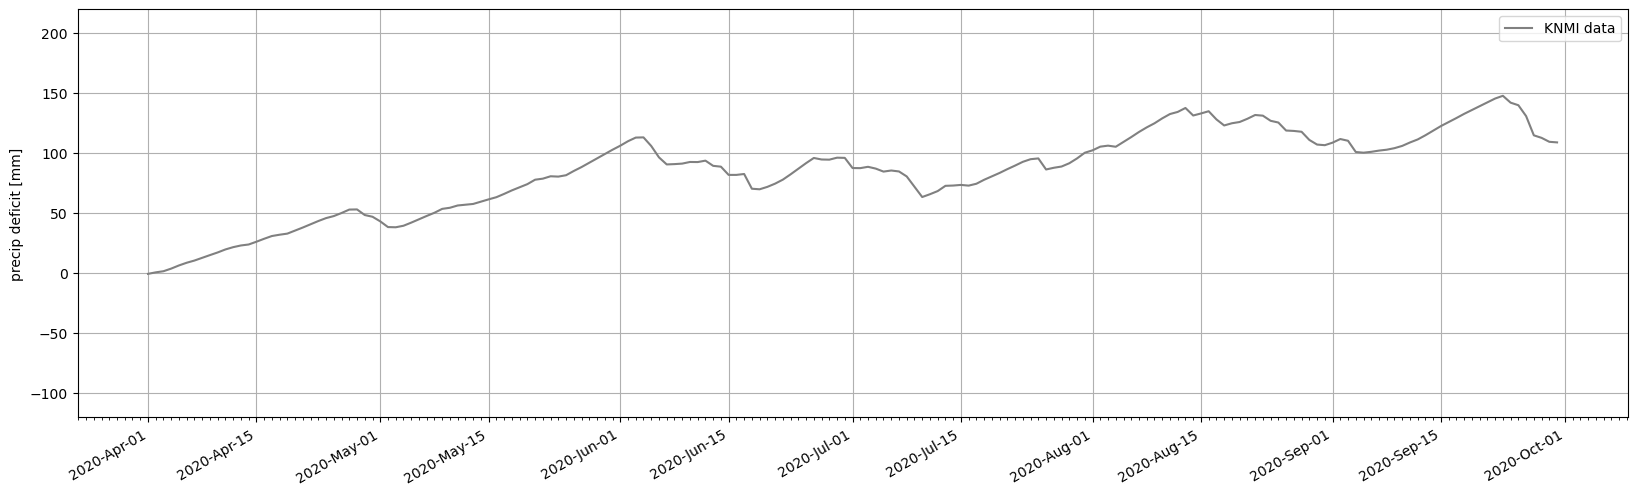

In [32]:
plt.rcParams["figure.figsize"] = (20,6)

#st="2005-04-01"
#ed="2005-09-30"

def SPEI_plot_wrapper(st,ed):

    fig,ax = plt.subplots()

    #a=df_Pdef.loc[st:ed,['Loo_deficit']]
    #ax.bar(a.index,a['Loo_deficit'],alpha=0.5, align='edge', label="EC data")

    b=df_Pdef.loc[st:ed,['deficit']]
    ax.plot(b.index,b['deficit'], c='grey', label="KNMI data")

    ax.set_ylabel("precip deficit [mm]")
    ax.set_ylim(-120,220)
    
    #ax2 = ax.twinx()
    #ax2.set_ylim(0,5)
    #ax2.set_ylabel("fstr")
    #ax2.set_yscale('log')
    #ax2.scatter(c.index,c['LE/ET'],c=np.where(c['LE/ET']<1,'b','r'))
    
    ax.legend()
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=[1,15]))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b-%d'))
    fig.autofmt_xdate()
    ax.grid()



for year in range(2001,2021):
    st=str(year)+"-04-01"
    ed=str(year)+"-09-30"
    SPEI_plot_wrapper(st,ed)

In [33]:
df_Pdef

deficit  LE_mmday2    RD  Loo_deficit
2001-04-01   -0.634161   7.133534   0.2     6.933534
2001-04-02    2.028760  20.884096   0.0    20.884096
2001-04-03    3.558460  12.431782   0.0    12.431782
2001-04-04    3.155690  12.541720   0.0    12.541720
2001-04-05   -0.117146  11.173336   2.3     8.873336
...                ...        ...   ...          ...
2020-09-26  131.039000  14.354307   1.0    13.354307
2020-09-27  115.007000   4.851381  20.2   -15.348619
2020-09-28  112.897000   0.861765   2.2    -1.338235
2020-09-29  109.613000   4.560164   9.6    -5.039836
2020-09-30  109.124000  10.003795   0.5     9.503795

[3660 rows x 4 columns]

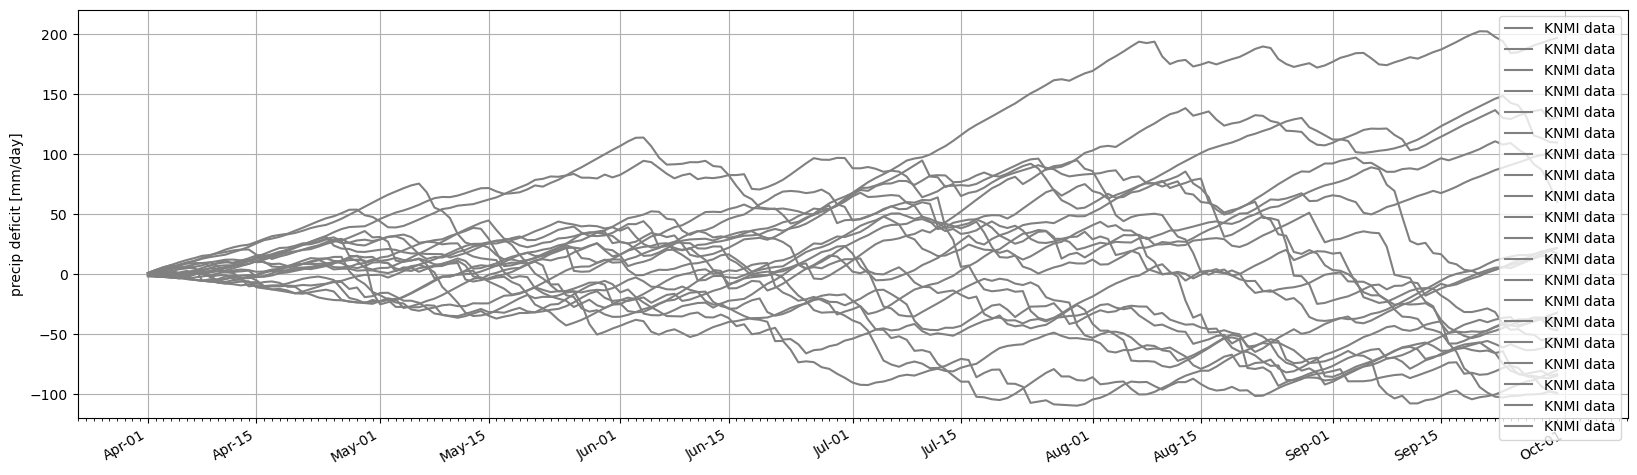

In [34]:
plt.rcParams["figure.figsize"] = (20,6)

#st="2005-04-01"
#ed="2005-09-30"

def SPEI_multiplot(input):

    fig,ax = plt.subplots()

    tmp=input.copy() #loc[['deficit']]
    tmp['monthday']=tmp.index.strftime('2000-%m-%d')
    

    ax.set_ylabel("precip deficit [mm/day]")
    ax.set_ylim(-120,220)

    for year in range(2001,2021):
        st=str(year)+"-04-01"
        ed=str(year)+"-09-30"
        df_plot=tmp.loc[st:ed,['monthday','deficit']]
        df_plot.index=pd.DatetimeIndex(df_plot['monthday'])
        ax.plot(df_plot.index,df_plot['deficit'], c='grey', label="KNMI data")
    
    ax.legend()
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=[1,15]))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    fig.autofmt_xdate()
    ax.grid()

SPEI_multiplot(df_Pdef)

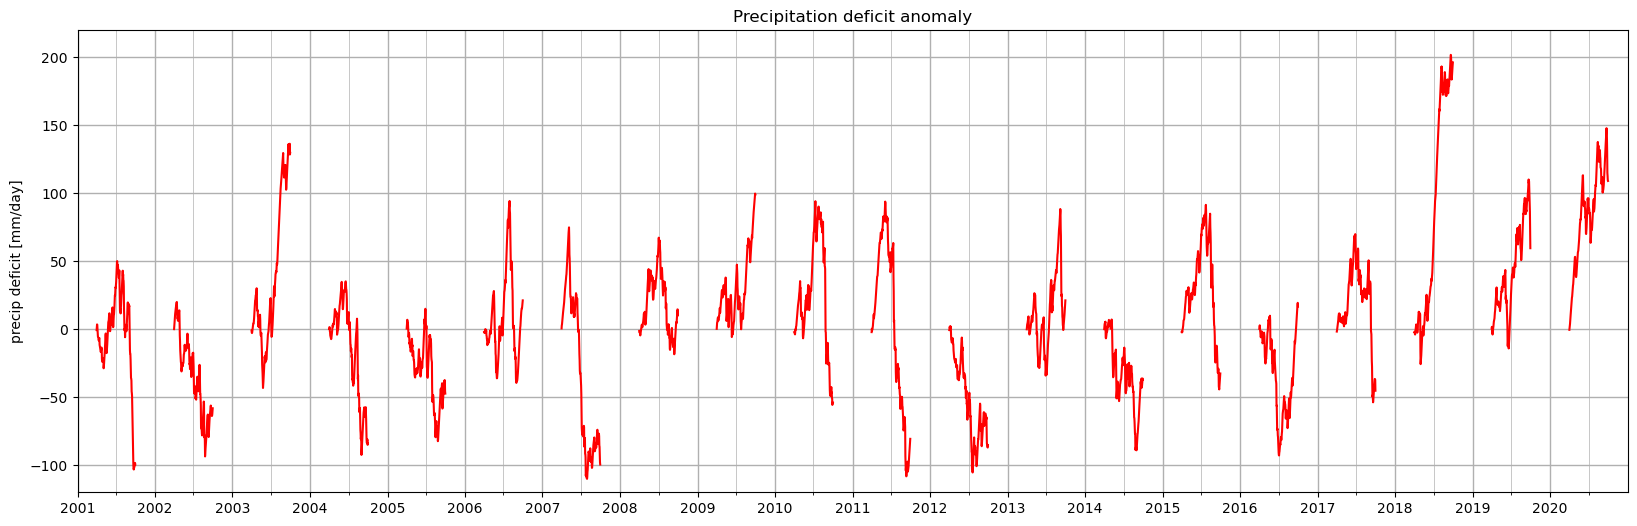

In [35]:
plt.rcParams["figure.figsize"] = (20,6)

#st="2005-04-01"
#ed="2005-09-30"

def SPEI_multiplot(input):

    fig,ax = plt.subplots()

    tmp=input.copy() #loc[['deficit']]
    tmp['monthday']=tmp.index.strftime('2000-%m-%d')
    

    ax.set_ylabel("precip deficit [mm/day]")
    ax.set_ylim(-120,220)

    for year in range(2001,2021):
        st=str(year)+"-04-01"
        ed=str(year)+"-09-30"
        df_plot=tmp.loc[st:ed,['monthday','deficit']]
        ax.plot(df_plot.index,df_plot['deficit'], c='r')

    
    #ax.legend()
    ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=7))
    ax.xaxis.set_major_locator(mdates.YearLocator())
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    #fig.autofmt_xdate()
    ax.set_xlim(pd.to_datetime('2001-1-1'),pd.to_datetime('2020-12-31'))
    ax.grid(which='major', linewidth=1)
    ax.grid(which='minor', linewidth=0.5)

    ax.set_title('Precipitation deficit anomaly')

SPEI_multiplot(df_Pdef)

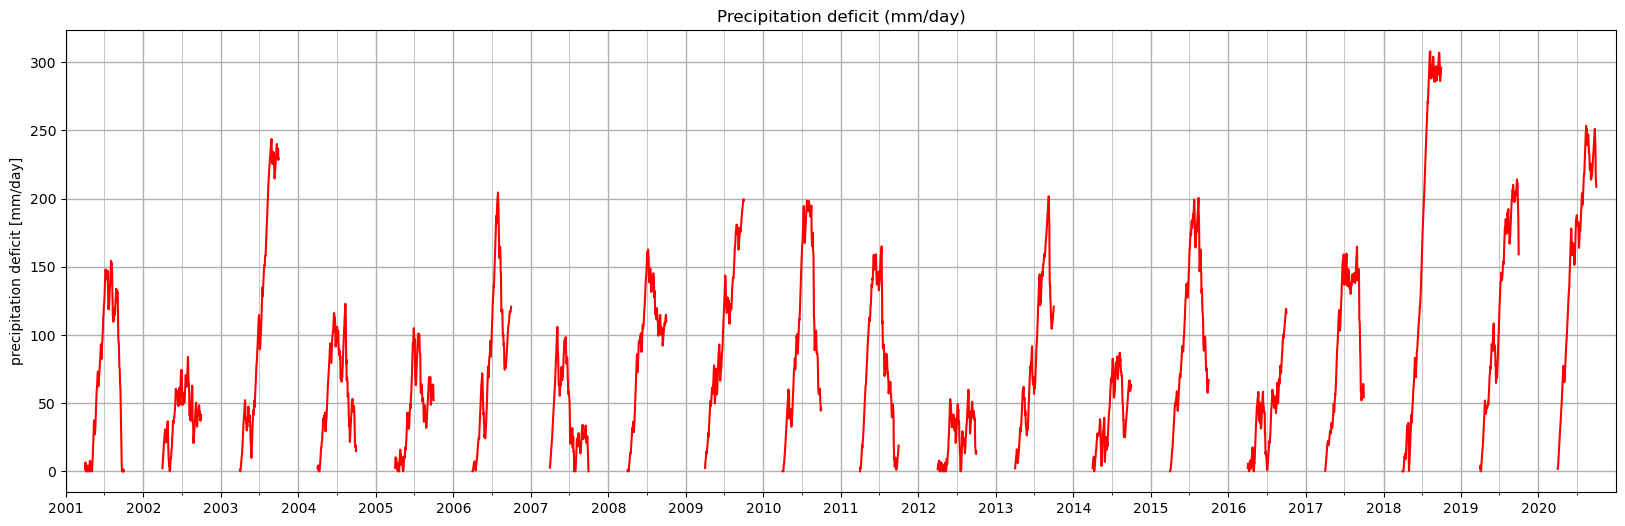

In [6]:
plt.rcParams["figure.figsize"] = (20,6)


def generate_knmi_Pdeficit(path):
    output=pd.read_csv(path,delim_whitespace=True)
    output['date']=pd.to_datetime(output['date'],format='%Y%m%d')
    output.index=output['date'] # assign as index
    return output

def Pdeficit_multiplot(input):

    fig,ax = plt.subplots()

    tmp=input.loc['2001-04-01':'2020-09-30'].copy() 
    
    ax.set_ylabel("precipitation deficit [mm/day]")
    #ax.set_ylim(-120,220)

    for year in range(2001,2021): #this loop prevents each year connecting to the next with a line
        st=str(year)+"-04-01"
        ed=str(year)+"-09-30"
        df_plot=tmp.loc[st:ed,['deficit']]
        ax.plot(df_plot.index,df_plot['deficit'], c='r')

    
    #ax.legend()
    ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=7))
    ax.xaxis.set_major_locator(mdates.YearLocator())
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    #fig.autofmt_xdate()
    ax.set_xlim(pd.to_datetime('2001-1-1'),pd.to_datetime('2020-12-31'))
    ax.grid(which='major', linewidth=1)
    ax.grid(which='minor', linewidth=0.5)

    ax.set_title('Precipitation deficit (mm/day)')

df_new=generate_knmi_Pdeficit('../../KNMI_regen/int_nl_2001_2023_2.dat.txt')

Pdeficit_multiplot(df_new)

## Plots for in Thesis

C:\Users\feder\AppData\Local\Temp\ipykernel_17372\358351203.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '73.65573770491801' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_plot.loc[year,'deficit_mean']=tmp.loc[st:ed,'deficit'].sum()/183


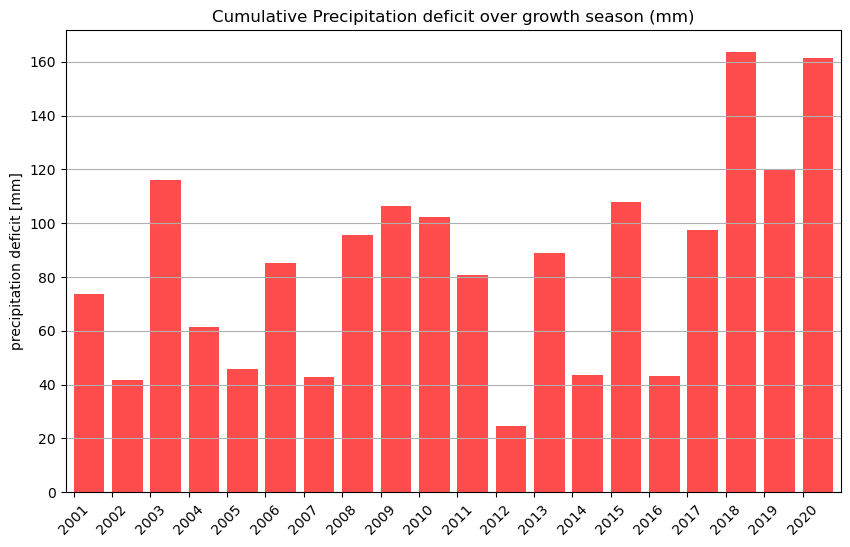

In [9]:
plt.rcParams["figure.figsize"] = (10,6)

def Pdeficit_bars(input):

    fig,ax = plt.subplots()

    tmp=input.loc['2001-04-01':'2020-09-30'].copy() 

    ax.set_ylabel("precipitation deficit [mm]")
    #ax.set_ylim(-120,220)

    #xaxis ticks are integers
    i_index=[year for year in range(2001,2021)]
    df_plot = pd.DataFrame(index=i_index,data={'deficit_mean':[0 for year in range(2001,2021)]})
    #version where x axis ticks are datetimes instead of ints
    #i_index=pd.to_datetime([year for year in range(2001,2021)],format='%Y')
    #df_plot = pd.DataFrame(index=i_index,data={'deficit_mean':[0 for year in range(2001,2021)]})

    for year in range(2001,2021): #this loop prevents each year connecting to the next with a line
        st=str(year)+"-04-01"
        ed=str(year)+"-09-30"
        df_plot.loc[year,'deficit_mean']=tmp.loc[st:ed,'deficit'].sum()/183
        #df_plot.loc[str(year)+'-01-01','deficit_mean']=tmp.loc[st:ed,'deficit'].sum()/183 #divide by amount of days between april 1 and sep 30: 183 days
    #print(df_plot)
    
    ax.bar(df_plot.index,df_plot['deficit_mean'],color='r',alpha=0.7,align='edge')
    ax.set_xticks([year for year in range(2001,2021)])
    ax.set_xticklabels([year for year in range(2001,2021)],rotation=45)
    
    #ax.legend()
    ax.set_xlim(2000.8,2021)

    ax.grid(axis='y')
    #ax.grid(which='major', linewidth=1)
    #ax.grid(which='minor', linewidth=0.5)

    ax.set_title('Cumulative Precipitation deficit over growth season (mm)')

df_new=generate_knmi_Pdeficit('../../KNMI_regen/int_nl_2001_2023_2.dat.txt')

Pdeficit_bars(df_new)

C:\Users\feder\AppData\Local\Temp\ipykernel_17372\358351203.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '73.65573770491801' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_plot.loc[year,'deficit_mean']=tmp.loc[st:ed,'deficit'].sum()/183


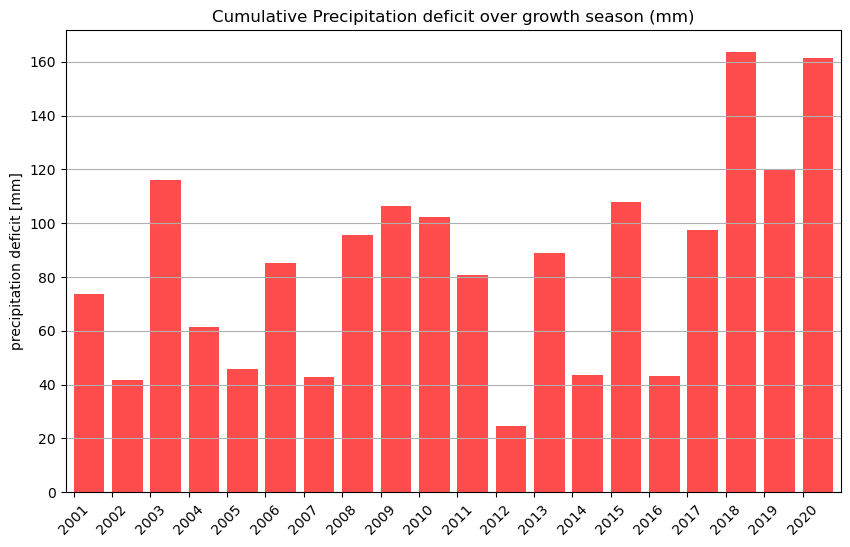

In [9]:
plt.rcParams["figure.figsize"] = (10,6)

def Pdeficit_wint_sum_bars(input):

    fig,ax = plt.subplots()

    tmp=input.loc['2001-04-01':'2020-09-30'].copy() 

    ax.set_ylabel("precipitation deficit [mm]")
    #ax.set_ylim(-120,220)

    #xaxis ticks are integers
    i_index=[year for year in range(2001,2021)]
    df_plot = pd.DataFrame(index=i_index,data={'deficit_mean':[0 for year in range(2001,2021)]})
    #version where x axis ticks are datetimes instead of ints
    #i_index=pd.to_datetime([year for year in range(2001,2021)],format='%Y')
    #df_plot = pd.DataFrame(index=i_index,data={'deficit_mean':[0 for year in range(2001,2021)]})

    for year in range(2001,2021): #this loop prevents each year connecting to the next with a line
        st=str(year)+"-04-01"
        ed=str(year)+"-09-30"
        df_plot.loc[year,'deficit_mean']=tmp.loc[st:ed,'deficit'].sum()/183
        #df_plot.loc[str(year)+'-01-01','deficit_mean']=tmp.loc[st:ed,'deficit'].sum()/183 #divide by amount of days between april 1 and sep 30: 183 days
    #print(df_plot)
    
    ax.bar(df_plot.index,df_plot['deficit_mean'],color='r',alpha=0.7,align='edge')
    ax.set_xticks([year for year in range(2001,2021)])
    ax.set_xticklabels([year for year in range(2001,2021)],rotation=45)
    
    #ax.legend()
    ax.set_xlim(2000.8,2021)

    ax.grid(axis='y')
    #ax.grid(which='major', linewidth=1)
    #ax.grid(which='minor', linewidth=0.5)

    ax.set_title('Cumulative Precipitation deficit over growth season (mm)')

df_new=generate_knmi_Pdeficit('../../KNMI_regen/int_nl_2001_2023_2.dat.txt')

Pdeficit_bars(df_new)

C:\Users\feder\AppData\Local\Temp\ipykernel_17372\2271869819.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '73.65573770491801' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_plot.loc[year,'deficit_mean']=tmp.loc[st:ed,'deficit'].sum()/183


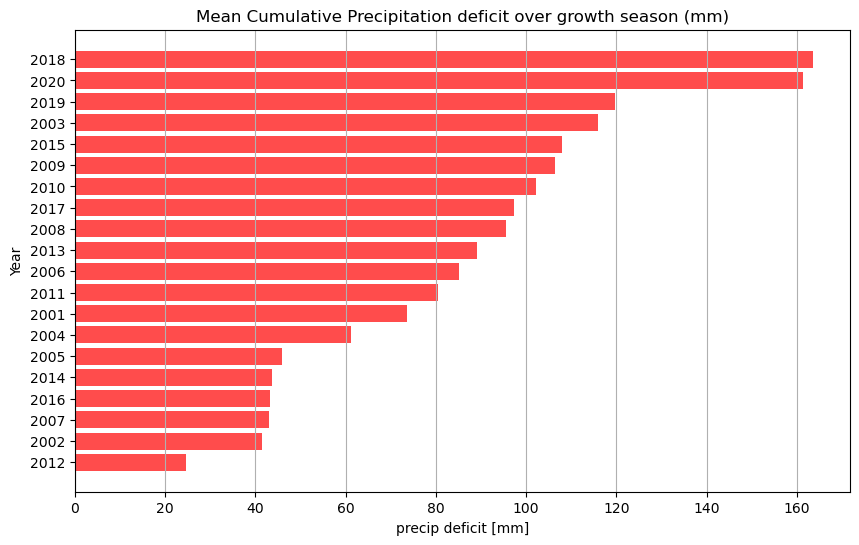

In [8]:
plt.rcParams["figure.figsize"] = (10,6)

def Pdeficit_hbars(input):

    fig,ax = plt.subplots()

    tmp=input.loc['2001-04-01':'2020-09-30'].copy() 

    ax.set_xlabel("precip deficit [mm]")
    ax.set_ylabel("Year")
    #ax.set_ylim(-120,220)

    #xaxis ticks are integers
    i_index=[year for year in range(2001,2021)]
    df_plot = pd.DataFrame(index=i_index,data={'deficit_mean':[0 for year in range(2001,2021)]})
    df_plot['year']=df_plot.index
    df_plot_sorted = pd.DataFrame(index=i_index,data={'a':[0 for year in range(2001,2021)]})
    #version where x axis ticks are datetimes instead of ints
    #i_index=pd.to_datetime([year for year in range(2001,2021)],format='%Y')
    #df_plot = pd.DataFrame(index=i_index,data={'deficit_mean':[0 for year in range(2001,2021)]})

    #print(df_plot_sorted)
    for year in range(2001,2021): #this loop prevents each year connecting to the next with a line
        st=str(year)+"-04-01"
        ed=str(year)+"-09-30"
        df_plot.loc[year,'deficit_mean']=tmp.loc[st:ed,'deficit'].sum()/183
    df_plot=df_plot.sort_values(by=['deficit_mean'])
    df_plot['year']=df_plot.index
    df_plot['nums']=np.arange(1,21)
    df_plot.index=df_plot['nums']
    
    ax.barh(df_plot.index,df_plot['deficit_mean'],color='r',alpha=0.7,align='center')

    ax.set_yticks(df_plot.index)
    ax.set_yticklabels(df_plot['year'])

    #ax.legend()
    #ax.set_xlim(2000.8,2021)
    #ax.set_xlim(0,21)
    
    ax.set_title('Mean Cumulative Precipitation deficit over growth season (mm)')
    ax.grid(axis='x')
    #ax.grid(which='major', linewidth=1)
    #ax.grid(which='minor', linewidth=0.5)


df_new=generate_knmi_Pdeficit('../../KNMI_regen/int_nl_2001_2023_2.dat.txt')

Pdeficit_hbars(df_new)

In [ ]:
plt.rcParams["figure.figsize"] = (16,6)

def Pdeficit_twobars(input):

    fig, (ax1,ax2) = plt.subplots(1,2)
    tmp=input.loc['2001-04-01':'2020-09-30'].copy() 

    i_index=[year for year in range(2001,2021)]
    df_plot = pd.DataFrame(index=i_index,data={'deficit_mean':[0 for year in range(2001,2021)]})

    for year in range(2001,2021): #this loop prevents each year connecting to the next with a line
        st=str(year)+"-04-01"
        ed=str(year)+"-09-30"
        df_plot.loc[year,'deficit_mean']=tmp.loc[st:ed,'deficit'].sum()/183 #divide by amount of days between april 1 and sep 30: 183 days
    ax1.bar(df_plot.index,df_plot['deficit_mean'],color='r',alpha=0.7,align='edge')
    ax1.set_xlim(2000.8,2021)
    ax1.set_xlabel("year")
    ax1.set_ylabel("mean cumulative precipitation deficit [mm/day]")
    ax1.grid(axis='y')
    ax1.set_title('Mean cumulative precipitation deficit sorted by year')
    ax1.set_xticks([year for year in range(2001,2021)])
    ax1.set_xticklabels([year for year in range(2001,2021)],rotation=45)
    
    df_plot=df_plot.sort_values(by=['deficit_mean'])
    df_plot['year']=df_plot.index
    df_plot['nums']=np.arange(1,21)
    df_plot.index=df_plot['nums']
    
    ax2.barh(df_plot.index,df_plot['deficit_mean'],color='r',alpha=0.7,align='center')
    ax2.set_yticks(df_plot.index)
    ax2.set_yticklabels(df_plot['year'])
    ax2.set_xlabel("mean cumulative precipitation deficit [mm/day]")
    ax2.set_ylabel("year")
    ax2.grid(axis='x')
    ax2.set_title('Mean cumulative precipitation deficit sorted highest to lowest')
    
    fig.suptitle('Mean cumulative precipitation deficit over growth season (sum of precipitation deficit divided by days in growthseason)')
    fig.tight_layout()

df_new=generate_knmi_Pdeficit('../KNMI_regen/int_nl_2001_2023_2.dat.txt')

Pdeficit_twobars(df_new)

In [ ]:
import netCDF4

In [ ]:
#modified Makkink from paper:
#Bruin, H.A.R. de, W.N. Lablans. 1998. Reference crop evapotranspiration determined with a
#modified Makkink equation. Hydrological Processes 12:1053-1062

#according to https://www.stowa.nl/deltafacts/zoetwatervoorziening/droogte/verdamping this equation is the one used by KNMI

#LvE=0.65*(s/(s+gamma))*Shortwave_in
#s is the slope of e at Ta aka delta
#df_gs['delta'] = 4098 * (0.6108 * np.exp((17.27*df_gs['Tair'])/(df_gs['Tair']+237.3))) / ((df_gs['Tair']+237.3)**2)  # T in K?, delta in kPa/K?

In [ ]:
df_Eref = pd.DataFrame()
#assemble inputs
df_Eref = pd.concat([df_Comb['Tair'],df_meteo['S(i)'],df_profile['Pressure']],axis=1,sort=False)
df_Eref=df_Eref.loc[df_Eref['Pressure']>800]
df_Eref['P_kPa'] = df_Eref['Pressure']/10
df_Eref

In [ ]:

#calculate gamma,  s (aka delta) and modified makkink Eref
cp=1006  #J/kg/K , approximation
Lv=2.26 #MJ/kg, based on 2260000 J/kg 
df_Eref['gamma'] = ((cp * df_Eref['P_kPa']*1000) / (0.622 * Lv*1000000)/1000) #cp in J/kg/K , P in Pa, Lv in J/kg , result in kPa/K
df_Eref['delta'] = 4098 * (0.6108 * np.exp((17.27*df_Eref['Tair'])/(df_Eref['Tair']+237.3))) / ((df_Eref['Tair']+237.3)**2)  # T in K, result in kPa/K

#LvE=0.65*(s/(s+gamma))*Shortwave_in
df_Eref['Eref']=(0.65*(df_Eref['delta']/(df_Eref['delta']+df_Eref['gamma']))*df_Eref['S(i)'])/Lv
df_Eref


In [ ]:
Eref_daily=df_Eref['Eref'].resample('1D').mean()
Eref_daily.plot()

In [ ]:
df_calcSPEI = pd.DataFrame()

df_calcSPEI = pd.concat([df_Comb['Tair'],df_Eref['Eref']]],axis=1,sort=False)


for ix, row in pd.iterrows():
    

In [ ]:
#df_Comb['E_0'].plot()

In [ ]:
df_profile['Pressure']/10

In [ ]:
df_knmi_daily12